# Real-world Data Wrangling

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement


The study combines the 2020 ACS PUMS dataset and OEWS data to analyze connections between socio-economic factors, including sex, disability, education, and employment in the U.S. It explores disparities in occupation, income, and workforce participation across demographic groups.

Key research questions include:

- How does the distribution of occupations vary based on sex, disability status, and educational attainment?
- Are there discernible correlations between educational attainment levels and wages within different occupations?
- What is the range of the average wage corresponding to manager positions and Legal positions?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: Json file

Method: I used the 2020 ACS PUMS dataset, downloaded it via the Census Data API of the United States Census Bureau.

Dataset variables:

DEAR - Hearing difficulty
- 1 - Yes
- 2 - No

DEYE - Vision difficulty
- 1 - Yes
- 2 - No

SEX - Gender
- 1 - Male
- 2 - Female

WRK - Worked last week
- 0 - N/A (Not reported)
- 1 - Worked
- 2 - Did not work

ACCESSNET - Access to the internet
- 0 - N/A (GQ/Vacant)
- 1 - Yes by paying a cell phone company or internet service provider
- 2 - Yes without paying a cell phone company or internet service provider
- 3 - No access to the internet at this house, apartment or mobile home

SOCP - Standard Occupational Classification Codes

SCHL - Educational Attainment
- 0 - N/A(Less than 3yrs old)
- 01 - No schooling completed
- 02 - Nursery school, preschool
- 03 - Kindergarten
- 04 - Grade 1
- 05 - Grade 2
- 06 - Grade 3
- 07 - Grade 4
- 08 - Grade 5
- 09 - Grade 6
- 10 - Grade 7
- 11 - Grade 8
- 12 - Grade 9
- 13 - Grade 10
- 14 - Grade 11
- 15 - 12th Grade - no diploma
- 16 - Regular high school diploma
- 17 - GED or alternative credential
- 18 - Some college, but less than 1 year
- 19 - 1 or more years of college credit, no degree
- 20 - Associate degree
- 21 - Bachelor's degree
- 22 - Master's degree
- 23 - Professional degree beyond a bachelor's degree
- 24 - Doctorate degree

API:https://data.census.gov/mdat/#/search?ds=ACSPUMS5Y2020&cv=SEX,DEAR,DEYE,WRK,ACCESSINET&rv=ucgid,SOCP&nv=SCHL&g=0400000US53

In [1]:
# Import modules to be used in this project
import pandas as pd
import requests
import numpy as np
import json
import seaborn as sns

In [2]:
# Your URL
url = "https://api.census.gov/data/2020/acs/acs5/pums?get=PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL&ucgid=0400000US53"

# Fetch the data from the URL
response = requests.get(url)
pums_data = response.json()

# Create a DataFrame from the JSON data and use the first row as headers
pums_df = pd.DataFrame(pums_data)

# Display the DataFrame
pums_df.head()

,0,1,2,3,4,5,6,7,8,9
0,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
1,9,0,2,2,2,2,0,-1,18,53
2,25,25,2,2,2,2,3,-1,20,53
3,25,25,2,2,2,2,3,-1,18,53
4,26,26,2,2,1,1,1,435051,18,53


Columns: PWGTP, WGTP, and ST are to be dropped.

SOCP column has -1 values: what does this mean?

In [3]:
#Get dimensions of the PUMS raw data
pums_df.shape

(366635, 10)

PUMS raw data has 366635 rows and 10 columns.

References
- https://www.bls.gov/soc/2018/soc_2018_manual.pdf
- https://data.wa.gov/Employment/Occupational-Employment-and-Wage-Estimates/icqj-j27g/about_data
- https://data.census.gov/mdat/#/search?ds=ACSPUMS5Y2020&cv=SEX,DEAR,DEYE,WRK,ACCESSINET&rv=ucgid,SOCP&nv=SCHL&g=0400000US53

#### Dataset 2

Type: CSV file

Method: The dataset comprises Occupational Employment and Wage Estimates, obtained manually from the State of Washington data site at the following link: https://data.wa.gov/Employment/Occupational-Employment-and-Wage-Estimates/icqj-j27g/about_data.

Dataset variables:
- ID
- Year
- Area code
- Area name
- SOC code
- Occupational title
- Employment
- 25th Percentile
- 50th Percentile
- 75th Percentile
- Average Wage
- Annual Wage

In [60]:
#FILL IN 2nd data gathering and loading method - Manual download to csv

oews_df = pd.read_csv('Occupational_Employment_and_Wage_Estimates_20240107.csv')

oews_df.head()

,ID,Year,Area code,Area name,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
0,1,2022,53,Washington,11-1011,Chief Executives,2992.0,134.42,82.20,NaN,NaN,279590.0
1,2,2022,53,Washington,11-1021,General and Operations Managers,48024.0,64.76,40.08,57.43,78.74,134690.0
2,3,2022,53,Washington,11-1031,Legislators,1318.0,NaN,NaN,NaN,NaN,119380.0
3,4,2022,53,Washington,11-2011,Advertising and Promotions Managers,240.0,71.80,58.00,63.59,77.91,149340.0
4,5,2022,53,Washington,11-2021,Marketing Managers,6621.0,78.38,55.91,73.25,99.20,163040.0


In [5]:
#Get dimensions of the OEWS raw data
oews_df.shape

(6920, 12)

OEWS raw data has 6920 rows and 12 columns.

Columns: Employment, 25th Percentile, 50th Percentile, 75th Percentile may not be useful for our analysis. So they need to be dropped.

In [6]:
#Storing raw data locally

oews_df.to_csv('OEWS_rawdata.csv', index=False)

pums_df.to_csv('PUMS_rawdata.csv', index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Tidiness Issue 1: Column Headers

Tidy data essentially follows 3 rules:


1. Each Variable Forms a Column


2. Each Observation Forms a Row

3. Each Type of Observational Unit Forms a Table


In [7]:
#Inspecting the PUMS dataframe visually

pums_df.head()

,0,1,2,3,4,5,6,7,8,9
0,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
1,9,0,2,2,2,2,0,-1,18,53
2,25,25,2,2,2,2,3,-1,20,53
3,25,25,2,2,2,2,3,-1,18,53
4,26,26,2,2,1,1,1,435051,18,53


In [8]:
#Inspecting the PUMS dataframe programmatically
pums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366635 entries, 0 to 366634
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       366635 non-null  object
 1   1       366635 non-null  object
 2   2       366635 non-null  object
 3   3       366635 non-null  object
 4   4       366635 non-null  object
 5   5       366635 non-null  object
 6   6       366635 non-null  object
 7   7       366635 non-null  object
 8   8       366635 non-null  object
 9   9       366635 non-null  object
dtypes: object(10)
memory usage: 28.0+ MB


As seen from this dataset column headers are values instead of variable names.It's apparent that the initial row in the PUMS DataFrame is intended to serve as the header for this dataset.


In [8]:
#Inspecting the OEWS dataframe visually

oews_df.head()

,ID,Year,Area code,Area name,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
0,1,2022,53,Washington,11-1011,Chief Executives,2992.0,134.42,82.20,NaN,NaN,279590.0
1,2,2022,53,Washington,11-1021,General and Operations Managers,48024.0,64.76,40.08,57.43,78.74,134690.0
2,3,2022,53,Washington,11-1031,Legislators,1318.0,NaN,NaN,NaN,NaN,119380.0
3,4,2022,53,Washington,11-2011,Advertising and Promotions Managers,240.0,71.80,58.00,63.59,77.91,149340.0
4,5,2022,53,Washington,11-2021,Marketing Managers,6621.0,78.38,55.91,73.25,99.20,163040.0


In [9]:
#Inspecting the OEWS dataframe programmatically

oews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6920 non-null   int64  
 1   Year                6920 non-null   int64  
 2   Area code           6920 non-null   int64  
 3   Area name           6920 non-null   object 
 4   SOC code            6920 non-null   object 
 5   Occupational title  6920 non-null   object 
 6   Employment          6763 non-null   float64
 7   Average wage        6454 non-null   float64
 8   25th Percentile     6425 non-null   float64
 9   50th Percentile     6379 non-null   float64
 10  75th Percentile     6334 non-null   float64
 11  Annual wage         6859 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 648.9+ KB


The OEWS dataframe does does not show a similar structural issue like the one encountered in the PUMS dataframe.

So as a result to solve the structural issue observed here will be to define the 0th row was a header for the PUMS dataframe.

### Tidiness Issue 2: Variables

**Redundant Columns:**
    
 - The OEWS dataframe comprises of columns that will not be relevant for our analysis project like; ID','25th Percentile','50th Percentile', '75th Percentile'. As a result, they will be removed.

In [10]:
# Check the columns in the OEWS dataframe

oews_df.columns

Index(['ID', 'Year', 'Area code', 'Area name', 'SOC code',
       'Occupational title', 'Employment', 'Average wage', '25th Percentile',
       '50th Percentile', '75th Percentile', 'Annual wage'],
      dtype='object')

In [11]:
#Inspecting the PUMS dataframe visually
pums_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,366635,366635,366635,366635,366635,366635,366635,366635,366635,366635
unique,299,271,3,3,3,4,5,531,26,2
top,13,13,2,2,2,1,1,-1,21,53
freq,21588,21871,185122,349400,357568,159083,327910,144894,62848,366634


In [12]:
#Inspecting the OEWS dataframe visually
oews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6920 non-null   int64  
 1   Year                6920 non-null   int64  
 2   Area code           6920 non-null   int64  
 3   Area name           6920 non-null   object 
 4   SOC code            6920 non-null   object 
 5   Occupational title  6920 non-null   object 
 6   Employment          6763 non-null   float64
 7   Average wage        6454 non-null   float64
 8   25th Percentile     6425 non-null   float64
 9   50th Percentile     6379 non-null   float64
 10  75th Percentile     6334 non-null   float64
 11  Annual wage         6859 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 648.9+ KB


Issue 2.2 should be removed.

### Quality Issue 1: Completeness

Focus will be missing values.

Regarding the PUMS dataset, where the NA/not reported value for the 'WRK' column is denoted as 0, also the same goes for SCHL column, our initial step in the assessment involves replacing these 0 values with NA. This adjustment allows us to utilize programmatic assessment functions for detecting missing data.

In [14]:
#Define the 0th row as header for this assessment; This will be done on the cleaning stage.
pums = pums_df.copy()
pums.columns = pums_df.iloc[0]
pums = pums.drop(pums.index[0])
pums = pums.reset_index(drop=True)

#Show the first few records
pums.head()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
0,9,0,2,2,2,2,0,-1,18,53
1,25,25,2,2,2,2,3,-1,20,53
2,25,25,2,2,2,2,3,-1,18,53
3,26,26,2,2,1,1,1,435051,18,53
4,26,26,1,2,1,2,1,-1,16,53


In [15]:
# Check the PUMS dataframe
pums.describe()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
count,366634,366634,366634,366634,366634,366634,366634,366634,366634,366634
unique,298,270,2,2,2,3,4,530,25,1
top,13,13,2,2,2,1,1,-1,21,53
freq,21588,21871,185122,349400,357568,159083,327910,144894,62848,366634


<AxesSubplot: >

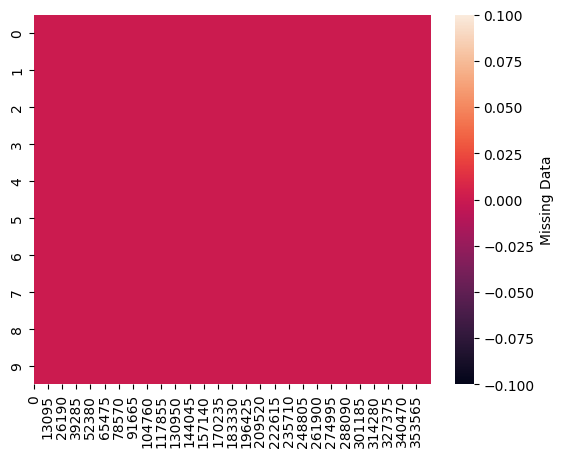

In [16]:
#Inspecting the PUMS dataframe visually
sns.heatmap(pums_df.isna().transpose(), cbar_kws={'label': 'Missing Data'})

In [17]:
# Replace the 0 values in WRK, ACCESSINT and SCHL with NaN
pums['WRK'] = pums['WRK'].replace({'0': np.nan})
pums['ACCESSINET'] = pums['ACCESSINET'].replace({'0': np.nan})
pums['SCHL'] = pums['SCHL'].replace({'0': np.nan})
pums.head()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
0,9,0,2,2,2,2,NaN,-1,18,53
1,25,25,2,2,2,2,3,-1,20,53
2,25,25,2,2,2,2,3,-1,18,53
3,26,26,2,2,1,1,1,435051,18,53
4,26,26,1,2,1,2,1,-1,16,53


In [18]:
# Checking programmatically 
print(pums.isnull().sum().sum())


119870


In [19]:
pums.describe()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
count,366634,366634,366634,366634,366634,274017,350582,366634,355433,366634
unique,298,270,2,2,2,2,3,530,24,1
top,13,13,2,2,2,1,1,-1,21,53
freq,21588,21871,185122,349400,357568,159083,327910,144894,62848,366634


In [21]:
pums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366634 entries, 0 to 366633
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PWGTP       366634 non-null  object
 1   WGTP        366634 non-null  object
 2   SEX         366634 non-null  object
 3   DEAR        366634 non-null  object
 4   DEYE        366634 non-null  object
 5   WRK         274017 non-null  object
 6   ACCESSINET  350582 non-null  object
 7   SOCP        366634 non-null  object
 8   SCHL        355433 non-null  object
 9   ST          366634 non-null  object
dtypes: object(10)
memory usage: 28.0+ MB


Both visually and programmatically, we see a number of NA values in the WRK, ACCESSINET and SCHL column. We can also inspect the range of values for any anomalous values that we would not expect to see: SOCP seems to have a -1 code which is unique.

**OEWS Data**


In [20]:
oews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6920 non-null   int64  
 1   Year                6920 non-null   int64  
 2   Area code           6920 non-null   int64  
 3   Area name           6920 non-null   object 
 4   SOC code            6920 non-null   object 
 5   Occupational title  6920 non-null   object 
 6   Employment          6763 non-null   float64
 7   Average wage        6454 non-null   float64
 8   25th Percentile     6425 non-null   float64
 9   50th Percentile     6379 non-null   float64
 10  75th Percentile     6334 non-null   float64
 11  Annual wage         6859 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 648.9+ KB


In [22]:
oews_df.describe()

,ID,Year,Area code,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
count,6920.000000,6920.0,6920.000000,6763.000000,6454.000000,6425.000000,6379.000000,6334.000000,6859.000000
mean,3460.500000,2022.0,93780.813584,1061.626645,32.315040,24.951682,29.621006,35.427213,68116.690480
std,1997.776264,0.0,165650.026016,4139.455943,17.766058,11.403929,13.289261,15.872855,36574.761315
min,1.000000,2022.0,53.000000,10.000000,11.910000,8.560000,10.050000,13.690000,24780.000000
25%,1730.750000,2022.0,28420.000000,47.000000,20.840000,17.510000,18.685000,22.950000,43930.000000
50%,3460.500000,2022.0,38900.000000,139.000000,27.600000,22.410000,26.310000,30.410000,59060.000000
75%,5190.250000,2022.0,47460.000000,521.500000,38.527500,29.450000,37.030000,46.167500,81485.000000
max,6920.000000,2022.0,530007.000000,89012.000000,176.270000,98.040000,99.960000,99.970000,366650.000000


Lets ensure that the dataframe columns,SOCP, Annual wage, and Average wage is a float and only contains numeric values.

In [23]:
assert oews_df['Annual wage'].dtype == 'float'

In [24]:
assert oews_df['Average wage'].dtype == 'float'

In [25]:
assert oews_df['SOCP'].dtype == 'int64'

KeyError: 'SOCP'

<AxesSubplot: >

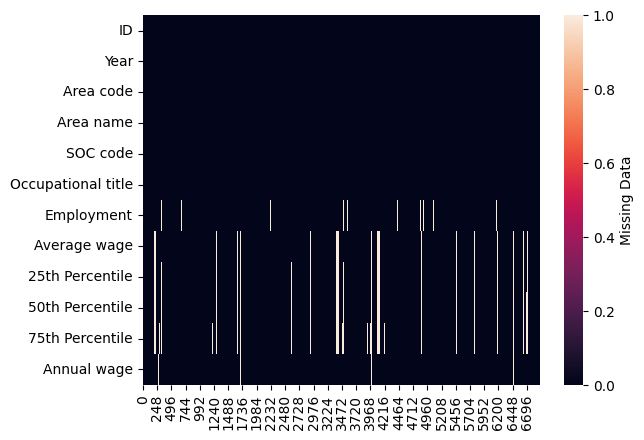

In [26]:
# Check visually
sns.heatmap(oews_df.isna().transpose(), cbar_kws={'label': 'Missing Data'})

In [27]:
# Check Programmatically
print(oews_df.isnull().sum().sum())
print(oews_df.info())

2306
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6920 non-null   int64  
 1   Year                6920 non-null   int64  
 2   Area code           6920 non-null   int64  
 3   Area name           6920 non-null   object 
 4   SOC code            6920 non-null   object 
 5   Occupational title  6920 non-null   object 
 6   Employment          6763 non-null   float64
 7   Average wage        6454 non-null   float64
 8   25th Percentile     6425 non-null   float64
 9   50th Percentile     6379 non-null   float64
 10  75th Percentile     6334 non-null   float64
 11  Annual wage         6859 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 648.9+ KB
None


Columns like Employment, Average wage, 25th Percentile, 50th Percentile, 75th Percentile, and Annual wage have NAN values, as a result this does not give a true depiction of the summary statistics.

### Quality Issue 2: Consistency

In this part of the assessment, we look for consistency across representations of data. In particular, a key area of inconsistency we see is between the SOCP and OCC_code variables  - specifically the format(the lack of a hyphen in the PUMS SOCP column) and also records which do not correspond to any SOCP value as in the manual.

#### Check values that are not consistent in the SOCP columns for PUMS dataframe

In [29]:
## Filter to see the records

pums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366634 entries, 0 to 366633
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PWGTP       366634 non-null  object
 1   WGTP        366634 non-null  object
 2   SEX         366634 non-null  object
 3   DEAR        366634 non-null  object
 4   DEYE        366634 non-null  object
 5   WRK         274017 non-null  object
 6   ACCESSINET  350582 non-null  object
 7   SOCP        366634 non-null  object
 8   SCHL        355433 non-null  object
 9   ST          366634 non-null  object
dtypes: object(10)
memory usage: 28.0+ MB


In [30]:
pums['SOCP'].describe()

count     366634
unique       530
top           -1
freq      144894
Name: SOCP, dtype: object

In [31]:
#Inspecting the PUMS dataframe visually
pums['SOCP'].head()

0        -1
1        -1
2        -1
3    435051
4        -1
Name: SOCP, dtype: object

In [34]:
#Inspecting the PUMS dataframe programmatically
pums['SOCP'].sample()

249905    1191XX
Name: SOCP, dtype: object

In [35]:
#Inspecting the dataframe visually
pums.head()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
0,9,0,2,2,2,2,NaN,-1,18,53
1,25,25,2,2,2,2,3,-1,20,53
2,25,25,2,2,2,2,3,-1,18,53
3,26,26,2,2,1,1,1,435051,18,53
4,26,26,1,2,1,2,1,-1,16,53


In [36]:
#Inspecting the dataframe pvisually
oews_df['SOC code'].sample()

941    29-1123
Name: SOC code, dtype: object

In [37]:
#Inspecting the dataframe programmatically
oews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6920 non-null   int64  
 1   Year                6920 non-null   int64  
 2   Area code           6920 non-null   int64  
 3   Area name           6920 non-null   object 
 4   SOC code            6920 non-null   object 
 5   Occupational title  6920 non-null   object 
 6   Employment          6763 non-null   float64
 7   Average wage        6454 non-null   float64
 8   25th Percentile     6425 non-null   float64
 9   50th Percentile     6379 non-null   float64
 10  75th Percentile     6334 non-null   float64
 11  Annual wage         6859 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 648.9+ KB


PUMS SOCP column which are not consistent in representation of the codes, containing XX in the codes. There is -1 values also. OEWS data has SOC codes with a hyphen after the 2nd significant figure.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### Tidiness Issue 1: Column Headers

We'll first start by making copies of the dataframe, to ensure the raw dataframes are not impacted.

In [61]:
#FILL IN - Apply the cleaning strategy
# Make copies of the dataframes
cleaned_pums = pums_df.copy()
cleaned_oews = oews_df.copy()

For the first issue, we will re-define the 0th row as the header. We will ensure to make a copy of the dataframe

In [68]:
# Define the 0th row as the header 
cleaned_pums.columns = cleaned_pums.iloc[0]
cleaned_pums = cleaned_pums[1:].reset_index(drop=True)

In [69]:
cleaned_pums.head()

,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
0,9,0,2,2,2,2,0,-1,18,53
1,25,25,2,2,2,2,3,-1,20,53
2,25,25,2,2,2,2,3,-1,18,53
3,26,26,2,2,1,1,1,435051,18,53
4,26,26,1,2,1,2,1,-1,16,53


We'll then use the visual method to validate the data was not impacted before and after resetting the index, ensuring the 1st row is now the 0th row.

In [50]:
pums_df.head()

,0,1,2,3,4,5,6,7,8,9
0,PWGTP,WGTP,SEX,DEAR,DEYE,WRK,ACCESSINET,SOCP,SCHL,ST
1,9,0,2,2,2,2,0,-1,18,53
2,25,25,2,2,2,2,3,-1,20,53
3,25,25,2,2,2,2,3,-1,18,53
4,26,26,2,2,1,1,1,435051,18,53


In [70]:
# Check that the column names are now accurate
assert cleaned_pums.columns.dtype == 'object'

In [62]:
cleaned_oews.head()

,ID,Year,Area code,Area name,SOC code,Occupational title,Employment,Average wage,25th Percentile,50th Percentile,75th Percentile,Annual wage
0,1,2022,53,Washington,11-1011,Chief Executives,2992.0,134.42,82.20,NaN,NaN,279590.0
1,2,2022,53,Washington,11-1021,General and Operations Managers,48024.0,64.76,40.08,57.43,78.74,134690.0
2,3,2022,53,Washington,11-1031,Legislators,1318.0,NaN,NaN,NaN,NaN,119380.0
3,4,2022,53,Washington,11-2011,Advertising and Promotions Managers,240.0,71.80,58.00,63.59,77.91,149340.0
4,5,2022,53,Washington,11-2021,Marketing Managers,6621.0,78.38,55.91,73.25,99.20,163040.0


### Tidiness Issue 2: Variables

Issue 2.1: Lets take a look at selecting and keeping the right variables we need for the analysis. Per the problem statement, we would like to keep WRK, SEX, SOCP, DEAR, DEYE, ACCESSINET, and SCHL.

In [71]:
# Keep the WRK, SEX, and SCOP variables
cleaned_pums = cleaned_pums[['WRK', 'SEX', 'SOCP', 'DEAR', 'DEYE', 'ACCESSINET', 'SCHL']]
cleaned_pums.describe()

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL
count,366634,366634,366634,366634,366634,366634,366634
unique,3,2,530,2,2,4,25
top,1,2,-1,2,2,1,21
freq,159083,185122,144894,349400,357568,327910,62848


For the OEWS data, we would like to keep the Area Title(To filter specifially for California), the SOC code to match with the SOCP variable from the prior dataset, the Occupational title, Average wage, and Annual wage.

In [72]:
# Filtering the dataframe to specific data elements
cleaned_oews = cleaned_oews[['Area name','SOC code','Occupational title','Average wage', 'Annual wage']]

#Filter to show California only
cleaned_oews = cleaned_oews[cleaned_oews['Area name'] == 'Washington']
cleaned_oews.describe()

,Average wage,Annual wage
count,711.000000,763.000000
mean,35.367384,74519.921363
std,21.271499,43649.902337
min,14.410000,29970.000000
25%,22.225000,47060.000000
50%,29.670000,63740.000000
75%,41.355000,86575.000000
max,173.190000,360230.000000


In [65]:
# Resetting the index after filter
cleaned_oews = cleaned_oews.reset_index(drop=True)
cleaned_oews.head()

,Area name,SOC code,Occupational title,Average wage,Annual wage
0,Washington,11-1011,Chief Executives,134.42,279590.0
1,Washington,11-1021,General and Operations Managers,64.76,134690.0
2,Washington,11-1031,Legislators,NaN,119380.0
3,Washington,11-2011,Advertising and Promotions Managers,71.80,149340.0
4,Washington,11-2021,Marketing Managers,78.38,163040.0


##### Issue 3: Structural - Cmpleteness

We will deal with the missing values identified under the completeness domain first by replacing the missing values with the np.nan then by using the dropna() function. Finally, we assert the number of NA values is 0.

In [73]:
#Remove the NAN values/missing values in the PUMS data
cleaned_pums['WRK'] = cleaned_pums['WRK'].replace({'0': np.nan})
cleaned_pums['ACCESSINET'] = cleaned_pums['ACCESSINET'].replace({'0': np.nan})
cleaned_pums['SCHL'] = cleaned_pums['SCHL'].replace({'0': np.nan})
cleaned_pums = cleaned_pums.dropna()

#Check programmatically
assert cleaned_pums.isnull().sum().sum() == 0

In [88]:
# Check if there are still null and missing values
cleaned_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198730 entries, 3 to 366631
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   WRK         198730 non-null  object
 1   SEX         198730 non-null  object
 2   SOCP        198730 non-null  object
 3   DEAR        198730 non-null  object
 4   DEYE        198730 non-null  object
 5   ACCESSINET  198730 non-null  object
 6   SCHL        198730 non-null  object
dtypes: object(7)
memory usage: 12.1+ MB


In [89]:
# Print a few lines of the PUMS dataframe
cleaned_pums.head()

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL
3,1,2,435051,2,1,1,18
5,2,1,359021,2,2,1,16
6,1,1,5191XX,2,2,1,19
10,1,1,397010,2,2,1,17
13,1,1,299000,2,2,2,17


In [79]:
cleaned_oews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 774
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area name           775 non-null    object 
 1   SOC code            775 non-null    object 
 2   Occupational title  775 non-null    object 
 3   Average wage        711 non-null    float64
 4   Annual wage         763 non-null    float64
dtypes: float64(2), object(3)
memory usage: 36.3+ KB


In [80]:
#Remove the NAN values/missing values in the OEWS data
cleaned_oews = cleaned_oews.dropna()

#Check programmatically
assert cleaned_oews.isnull().sum().sum() == 0

In [81]:
# Check if there are still null and missing values
cleaned_oews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 774
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area name           708 non-null    object 
 1   SOC code            708 non-null    object 
 2   Occupational title  708 non-null    object 
 3   Average wage        708 non-null    float64
 4   Annual wage         708 non-null    float64
dtypes: float64(2), object(3)
memory usage: 33.2+ KB


Lets now check the datatypes for both dataframes after the processing so far, and ensure these are correct.

In [84]:
#Data types: we will keep the SCOP variable.
cleaned_pums.dtypes

0
WRK           object
SEX           object
SOCP          object
DEAR          object
DEYE          object
ACCESSINET    object
SCHL          object
dtype: object

In [83]:
# Print the data types
cleaned_oews.dtypes

Area name              object
SOC code               object
Occupational title     object
Average wage          float64
Annual wage           float64
dtype: object

<AxesSubplot: ylabel='Frequency'>

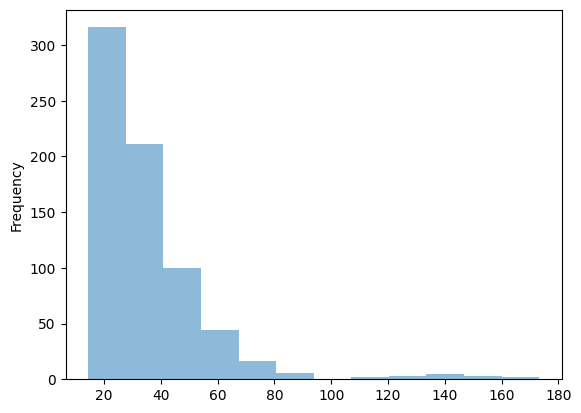

In [85]:
# Visually assess that the histogram values lies within an expected range
cleaned_oews['Average wage'].plot.hist(bins=12, alpha=0.5)

<AxesSubplot: ylabel='Frequency'>

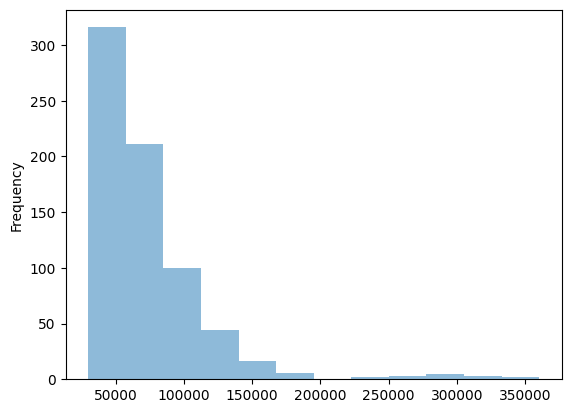

In [86]:
cleaned_oews['Annual wage'].plot.hist(bins=12, alpha=0.5)

##### Issue 4: Structural - Consistency

The final step of the cleaning is to combine our two datasets. As part of the initial testing stage, lets take a look at a visual groupby() plot to see the variation of values in our PUMS dataset first.

In [87]:
#Remove the SOCP values with -1 
cleaned_pums['SOCP'] = cleaned_pums['SOCP'].replace({'-1': np.nan})
cleaned_pums = cleaned_pums.dropna()

#Check programmatically
assert cleaned_pums.isnull().sum().sum() == 0

In [90]:
# Check if PUMS dataframe has null/missing values
cleaned_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198730 entries, 3 to 366631
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   WRK         198730 non-null  object
 1   SEX         198730 non-null  object
 2   SOCP        198730 non-null  object
 3   DEAR        198730 non-null  object
 4   DEYE        198730 non-null  object
 5   ACCESSINET  198730 non-null  object
 6   SCHL        198730 non-null  object
dtypes: object(7)
memory usage: 12.1+ MB


In [101]:
# Find SOCP values with XX at the end and replace with NAN
mask = cleaned_pums['SOCP'].str.endswith('XX')
cleaned_pums.loc[mask, 'SOCP'] = np.nan

# Drop rows with NaN values
cleaned_pums = cleaned_pums.dropna()

In [102]:
#Check programmatically
assert cleaned_pums.isnull().sum().sum() == 0

In [103]:
# View the PUMS first 15 records
cleaned_pums.head(15)

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL
3,1,2,435051,2,1,1,18
5,2,1,359021,2,2,1,16
10,1,1,397010,2,2,1,17
13,1,1,299000,2,2,2,17
14,1,1,434171,2,2,2,19
15,1,2,434051,2,2,1,21
16,1,1,113121,2,2,1,21
21,1,1,412031,2,2,1,22
22,1,2,291141,2,2,1,21
25,2,2,232011,2,2,3,21


In [107]:
# Sort PUMS according to SOCP in ascending order
sorted_pums_df = cleaned_pums.sort_values(by='SOCP', ascending=True)

# Print the first few lines of the sorted DataFrame
sorted_pums_df.head(15)

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL
266031,1,1,111021,2,2,1,21
312561,1,1,111021,2,2,1,18
165189,1,1,111021,2,2,1,22
140062,1,1,111021,2,2,1,21
89014,1,2,111021,2,2,1,21
312821,1,2,111021,2,2,1,20
248872,1,1,111021,2,2,1,20
165153,1,2,111021,2,2,1,19
179206,1,1,111021,2,2,1,21
165118,1,1,111021,2,2,1,21


In [105]:
cleaned_oews.head(15)

,Area name,SOC code,Occupational title,Average wage,Annual wage
0,Washington,11-1011,Chief Executives,134.42,279590.0
1,Washington,11-1021,General and Operations Managers,64.76,134690.0
3,Washington,11-2011,Advertising and Promotions Managers,71.80,149340.0
4,Washington,11-2021,Marketing Managers,78.38,163040.0
5,Washington,11-2022,Sales Managers,77.62,161450.0
6,Washington,11-2032,Public Relations Managers,70.25,146120.0
7,Washington,11-2033,Fundraising Managers,64.70,134570.0
8,Washington,11-3012,Administrative Services Managers,65.18,135580.0
9,Washington,11-3013,Facilities Managers,56.01,116490.0
10,Washington,11-3021,Computer and Information Systems Managers,85.64,178130.0


In [106]:
# Sort OEWS according to SOCP in ascending order
sorted_oews_df = cleaned_oews.sort_values(by='SOC code', ascending=True)

# Print the first few lines of the sorted DataFrame
sorted_oews_df.head(15)

,Area name,SOC code,Occupational title,Average wage,Annual wage
0,Washington,11-1011,Chief Executives,134.42,279590.0
1,Washington,11-1021,General and Operations Managers,64.76,134690.0
3,Washington,11-2011,Advertising and Promotions Managers,71.80,149340.0
4,Washington,11-2021,Marketing Managers,78.38,163040.0
5,Washington,11-2022,Sales Managers,77.62,161450.0
6,Washington,11-2032,Public Relations Managers,70.25,146120.0
7,Washington,11-2033,Fundraising Managers,64.70,134570.0
8,Washington,11-3012,Administrative Services Managers,65.18,135580.0
9,Washington,11-3013,Facilities Managers,56.01,116490.0
10,Washington,11-3021,Computer and Information Systems Managers,85.64,178130.0


In [104]:
cleaned_pums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180589 entries, 3 to 366626
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   WRK         180589 non-null  object
 1   SEX         180589 non-null  object
 2   SOCP        180589 non-null  object
 3   DEAR        180589 non-null  object
 4   DEYE        180589 non-null  object
 5   ACCESSINET  180589 non-null  object
 6   SCHL        180589 non-null  object
dtypes: object(7)
memory usage: 11.0+ MB


In [ ]:
# Assume 'Column_Name' is the column you want to query
values_to_match = ['value1', 'value2', 'value3']

# Query the DataFrame based on the conditions
filtered_df = df[df['Column_Name'].isin(values_to_match)]

We are seeing variation in the value counts , e.g, women(gender label: 2 ) are reported to be more in the occupation corresponding to 113031 than men(gender label: 1).

Lets now create a new column within the dataframe  with the new value, keeping the original column intact for cross-referencing.

In [108]:
cleaned_pums['SOC code'] = cleaned_pums['SOCP']
cleaned_pums.head()

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL,SOC code
3,1,2,435051,2,1,1,18,435051
5,2,1,359021,2,2,1,16,359021
10,1,1,397010,2,2,1,17,397010
13,1,1,299000,2,2,2,17,299000
14,1,1,434171,2,2,2,19,434171


We'll now change the SOC code variable within the cleaned wage dataframe to remove the hyphen identified in the assessment stage.

In [109]:
#Enforce consitency between OCC CODE values between dataframes
cleaned_oews['SOC code'] = cleaned_oews['SOC code'].replace('-', '', regex=True)
cleaned_oews.head()

,Area name,SOC code,Occupational title,Average wage,Annual wage
0,Washington,111011,Chief Executives,134.42,279590.0
1,Washington,111021,General and Operations Managers,64.76,134690.0
3,Washington,112011,Advertising and Promotions Managers,71.80,149340.0
4,Washington,112021,Marketing Managers,78.38,163040.0
5,Washington,112022,Sales Managers,77.62,161450.0


Now we we'll merge the two dataframes.

In [110]:
# Merge the two dataframes using only keys from the right frame

merged_df = pd.merge(cleaned_pums, cleaned_oews, on=['SOC code'], how='right')
merged_df.head()

,WRK,SEX,SOCP,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Area name,Occupational title,Average wage,Annual wage
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111011,Washington,Chief Executives,134.42,279590.0
1,1,1,111021,2,2,1,23,111021,Washington,General and Operations Managers,64.76,134690.0
2,1,1,111021,2,2,1,21,111021,Washington,General and Operations Managers,64.76,134690.0
3,2,2,111021,2,2,3,16,111021,Washington,General and Operations Managers,64.76,134690.0
4,1,2,111021,2,2,1,21,111021,Washington,General and Operations Managers,64.76,134690.0


In [111]:
# Check the number of records in the merged dataframe

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126052 entries, 0 to 126051
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   WRK                 125700 non-null  object 
 1   SEX                 125700 non-null  object 
 2   SOCP                125700 non-null  object 
 3   DEAR                125700 non-null  object 
 4   DEYE                125700 non-null  object 
 5   ACCESSINET          125700 non-null  object 
 6   SCHL                125700 non-null  object 
 7   SOC code            126052 non-null  object 
 8   Area name           126052 non-null  object 
 9   Occupational title  126052 non-null  object 
 10  Average wage        126052 non-null  float64
 11  Annual wage         126052 non-null  float64
dtypes: float64(2), object(10)
memory usage: 12.5+ MB


Lets now drop the NA values, and drop the unnecessary columns Area_Name and the redundant SOCP variable. We will also reset the index after dropping the NA values.

Note - decision justification: We chose not to remove duplicate values - in the context of this problem statement, we value the individual counts to show the number of individuals in the sample belonging to a certain occupation or gender.

In [112]:
merged_df = merged_df.dropna()
merged_df = merged_df.drop(columns=['Area name', 'SOCP'])
merged_df = merged_df.reset_index(drop=True)
merged_df.head()

,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Occupational title,Average wage,Annual wage
0,1,1,2,2,1,23,111021,General and Operations Managers,64.76,134690.0
1,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
2,2,2,2,2,3,16,111021,General and Operations Managers,64.76,134690.0
3,1,2,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
4,1,1,2,2,1,22,111021,General and Operations Managers,64.76,134690.0


In [116]:
# Check the last 15 records of the merged dataframe
merged_df.tail(15)

,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Occupational title,Average wage,Annual wage
125685,1,1,2,2,1,18,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125686,1,1,2,2,1,14,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125687,2,1,2,2,1,18,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125688,2,1,2,2,1,14,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125689,2,2,2,2,1,21,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125690,1,1,2,2,1,18,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125691,1,1,2,2,1,16,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125692,1,1,2,2,3,16,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125693,1,1,2,2,1,16,537081,Refuse and Recyclable Material Collectors,27.38,56950.0
125694,1,1,2,2,1,16,537081,Refuse and Recyclable Material Collectors,27.38,56950.0


In [113]:
# Check the number of records after removing NAN values and dropping redundant columns

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125700 entries, 0 to 125699
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   WRK                 125700 non-null  object 
 1   SEX                 125700 non-null  object 
 2   DEAR                125700 non-null  object 
 3   DEYE                125700 non-null  object 
 4   ACCESSINET          125700 non-null  object 
 5   SCHL                125700 non-null  object 
 6   SOC code            125700 non-null  object 
 7   Occupational title  125700 non-null  object 
 8   Average wage        125700 non-null  float64
 9   Annual wage         125700 non-null  float64
dtypes: float64(2), object(8)
memory usage: 9.6+ MB


For a quick visual assessment, lets redo the visualization - we can still see the variations between the genders and the roles they occupy.

In [138]:
# Filtering the SOC code column to remain with specific occupations(Management Occupations,Protective Service Occupations,
#Architecture and Engineering Occupations, and Legal Occupations)
prefixes_to_keep = ['11', '33', '17', '23']

# Create a boolean mask for rows with 'SOC code' starting with the specified prefixes
mask = merged_df['SOC code'].str.startswith(tuple(prefixes_to_keep))

# Apply the mask to filter the DataFrame
filtered_df = merged_df[mask]

In [128]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18705 entries, 0 to 54450
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WRK                 18705 non-null  object 
 1   SEX                 18705 non-null  object 
 2   DEAR                18705 non-null  object 
 3   DEYE                18705 non-null  object 
 4   ACCESSINET          18705 non-null  object 
 5   SCHL                18705 non-null  object 
 6   SOC code            18705 non-null  object 
 7   Occupational title  18705 non-null  object 
 8   Average wage        18705 non-null  float64
 9   Annual wage         18705 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.6+ MB


In [125]:
filtered_df.head(15)

,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Occupational title,Average wage,Annual wage
0,1,1,2,2,1,23,111021,General and Operations Managers,64.76,134690.0
1,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
2,2,2,2,2,3,16,111021,General and Operations Managers,64.76,134690.0
3,1,2,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
4,1,1,2,2,1,22,111021,General and Operations Managers,64.76,134690.0
5,1,2,2,2,1,20,111021,General and Operations Managers,64.76,134690.0
6,1,1,2,2,1,16,111021,General and Operations Managers,64.76,134690.0
7,2,1,2,1,1,16,111021,General and Operations Managers,64.76,134690.0
8,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
9,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0


In [161]:
# Assuming 'filtered_df' is the DataFrame you've filtered
filtered_df['Occupation'] = 'Other'  # Default value for rows not matching any condition

# Assign values based on the specified prefixes using .loc
filtered_df.loc[filtered_df['SOC code'].str.startswith('11'), 'Occupation'] = 'Management Occupations'
filtered_df.loc[filtered_df['SOC code'].str.startswith('33'), 'Occupation'] = 'Protective Service Occupations'
filtered_df.loc[filtered_df['SOC code'].str.startswith('17'), 'Occupation'] = 'Architecture and Engineering Occupations'
filtered_df.loc[filtered_df['SOC code'].str.startswith('23'), 'Occupation'] = 'Legal Occupations'


/tmp/ipykernel_14/2881240099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Occupation'] = 'Other'  # Default value for rows not matching any condition


In [193]:
filtered_df.head()

,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Occupational title,Average wage,Annual wage,Occupation
0,1,1,2,2,1,23,111021,General and Operations Managers,64.76,134690.0,Management Occupations
1,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0,Management Occupations
2,2,2,2,2,3,16,111021,General and Operations Managers,64.76,134690.0,Management Occupations
3,1,2,2,2,1,21,111021,General and Operations Managers,64.76,134690.0,Management Occupations
4,1,1,2,2,1,22,111021,General and Operations Managers,64.76,134690.0,Management Occupations


In [211]:
filtered_df.columns

Index(['WRK', 'SEX', 'DEAR', 'DEYE', 'ACCESSINET', 'SCHL', 'SOC code',
       'Occupational title', 'Average wage', 'Annual wage', 'Occupation'],
      dtype='object')

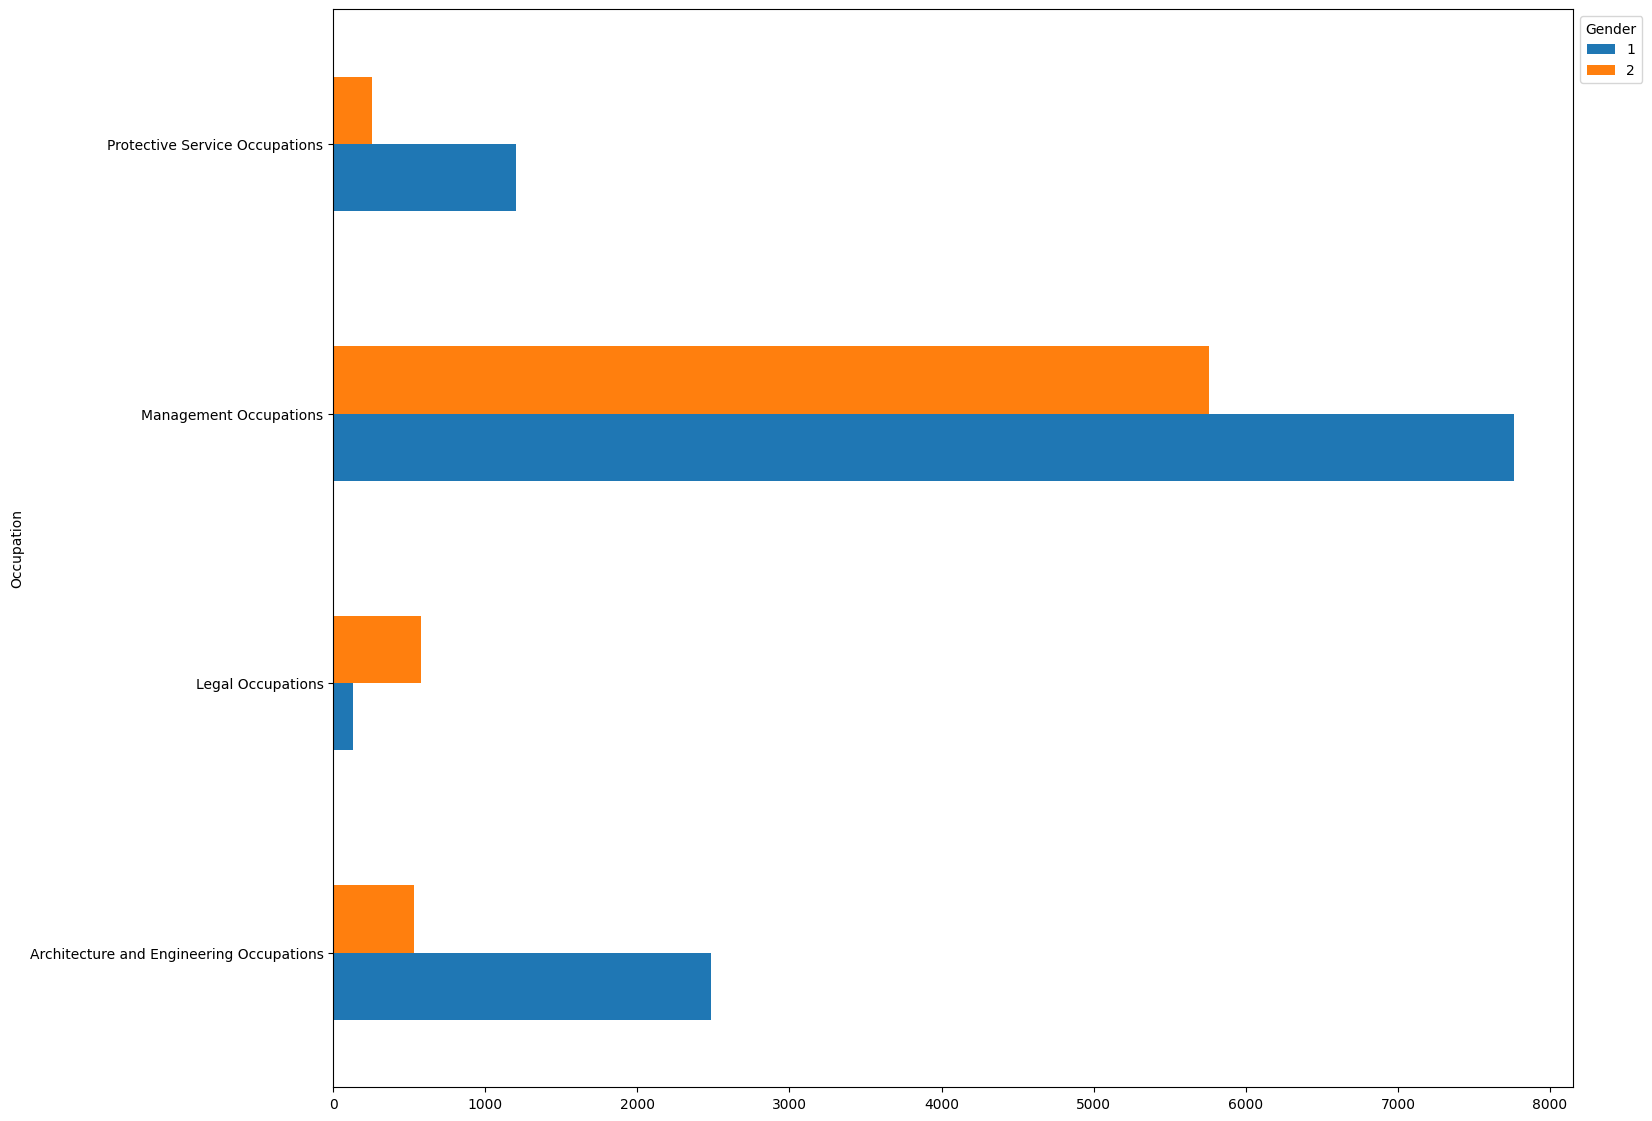

In [163]:
pums_viz_testplot = filtered_df.groupby(['Occupation']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left')

In [194]:
# Filtered df specific to Management Occupations
prefixes_to_keep = ['11']

# Create a boolean mask for rows with 'SOC code' starting with the specified prefixes
mask = merged_df['SOC code'].str.startswith(tuple(prefixes_to_keep))

# Apply the mask to filter the DataFrame
filtered_df_11 = merged_df[mask]

In [140]:
filtered_df_11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13519 entries, 0 to 13518
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WRK                 13519 non-null  object 
 1   SEX                 13519 non-null  object 
 2   DEAR                13519 non-null  object 
 3   DEYE                13519 non-null  object 
 4   ACCESSINET          13519 non-null  object 
 5   SCHL                13519 non-null  object 
 6   SOC code            13519 non-null  object 
 7   Occupational title  13519 non-null  object 
 8   Average wage        13519 non-null  float64
 9   Annual wage         13519 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [141]:
# Filtered df specific to Protective Service Occupations
prefixes_to_keep = ['33']

# Create a boolean mask for rows with 'SOC code' starting with the specified prefixes
mask = merged_df['SOC code'].str.startswith(tuple(prefixes_to_keep))

# Apply the mask to filter the DataFrame
filtered_df_33 = merged_df[mask]

In [142]:
filtered_df_33.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 52992 to 54450
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WRK                 1459 non-null   object 
 1   SEX                 1459 non-null   object 
 2   DEAR                1459 non-null   object 
 3   DEYE                1459 non-null   object 
 4   ACCESSINET          1459 non-null   object 
 5   SCHL                1459 non-null   object 
 6   SOC code            1459 non-null   object 
 7   Occupational title  1459 non-null   object 
 8   Average wage        1459 non-null   float64
 9   Annual wage         1459 non-null   float64
dtypes: float64(2), object(8)
memory usage: 125.4+ KB


In [143]:
# Filtered df specific to Architecture and Engineering Occupations
prefixes_to_keep = ['17']

# Create a boolean mask for rows with 'SOC code' starting with the specified prefixes
mask = merged_df['SOC code'].str.startswith(tuple(prefixes_to_keep))

# Apply the mask to filter the DataFrame
filtered_df_17 = merged_df[mask]

In [144]:
filtered_df_17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3018 entries, 29947 to 32964
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WRK                 3018 non-null   object 
 1   SEX                 3018 non-null   object 
 2   DEAR                3018 non-null   object 
 3   DEYE                3018 non-null   object 
 4   ACCESSINET          3018 non-null   object 
 5   SCHL                3018 non-null   object 
 6   SOC code            3018 non-null   object 
 7   Occupational title  3018 non-null   object 
 8   Average wage        3018 non-null   float64
 9   Annual wage         3018 non-null   float64
dtypes: float64(2), object(8)
memory usage: 259.4+ KB


In [145]:
# Filtered df specific to Legal Occupations
prefixes_to_keep = ['23']

# Create a boolean mask for rows with 'SOC code' starting with the specified prefixes
mask = merged_df['SOC code'].str.startswith(tuple(prefixes_to_keep))

# Apply the mask to filter the DataFrame
filtered_df_23 = merged_df[mask]

In [146]:
filtered_df_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 709 entries, 37010 to 37718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WRK                 709 non-null    object 
 1   SEX                 709 non-null    object 
 2   DEAR                709 non-null    object 
 3   DEYE                709 non-null    object 
 4   ACCESSINET          709 non-null    object 
 5   SCHL                709 non-null    object 
 6   SOC code            709 non-null    object 
 7   Occupational title  709 non-null    object 
 8   Average wage        709 non-null    float64
 9   Annual wage         709 non-null    float64
dtypes: float64(2), object(8)
memory usage: 60.9+ KB


In [115]:
# import matplotib module
import matplotlib.pyplot as plt

##### Check variations of Gender in Management Occupations

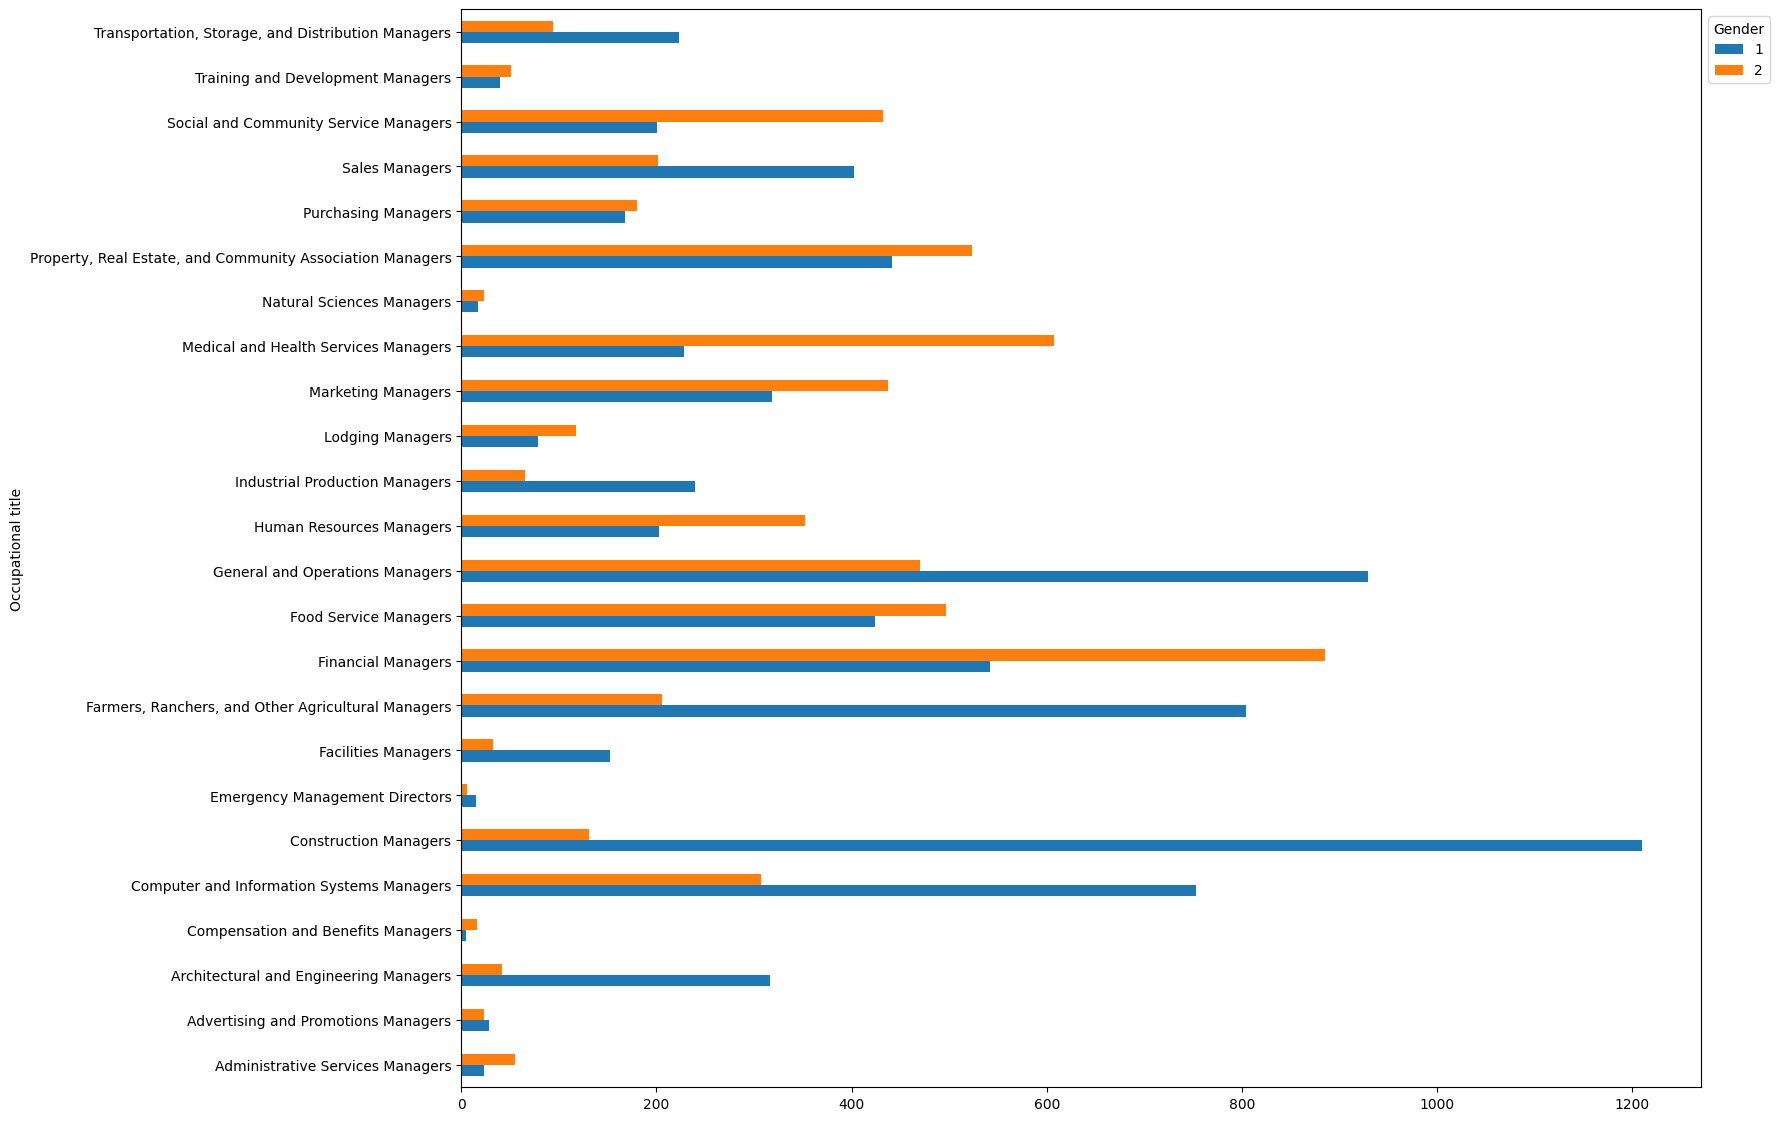

In [147]:
pums_viz_testplot = filtered_df_11.groupby(['Occupational title']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left')

We see women being more involved in management occupations. They occupy 50% of the total Management Occupations as compared to men.

##### Check variations of Gender in Protective Service Occupations

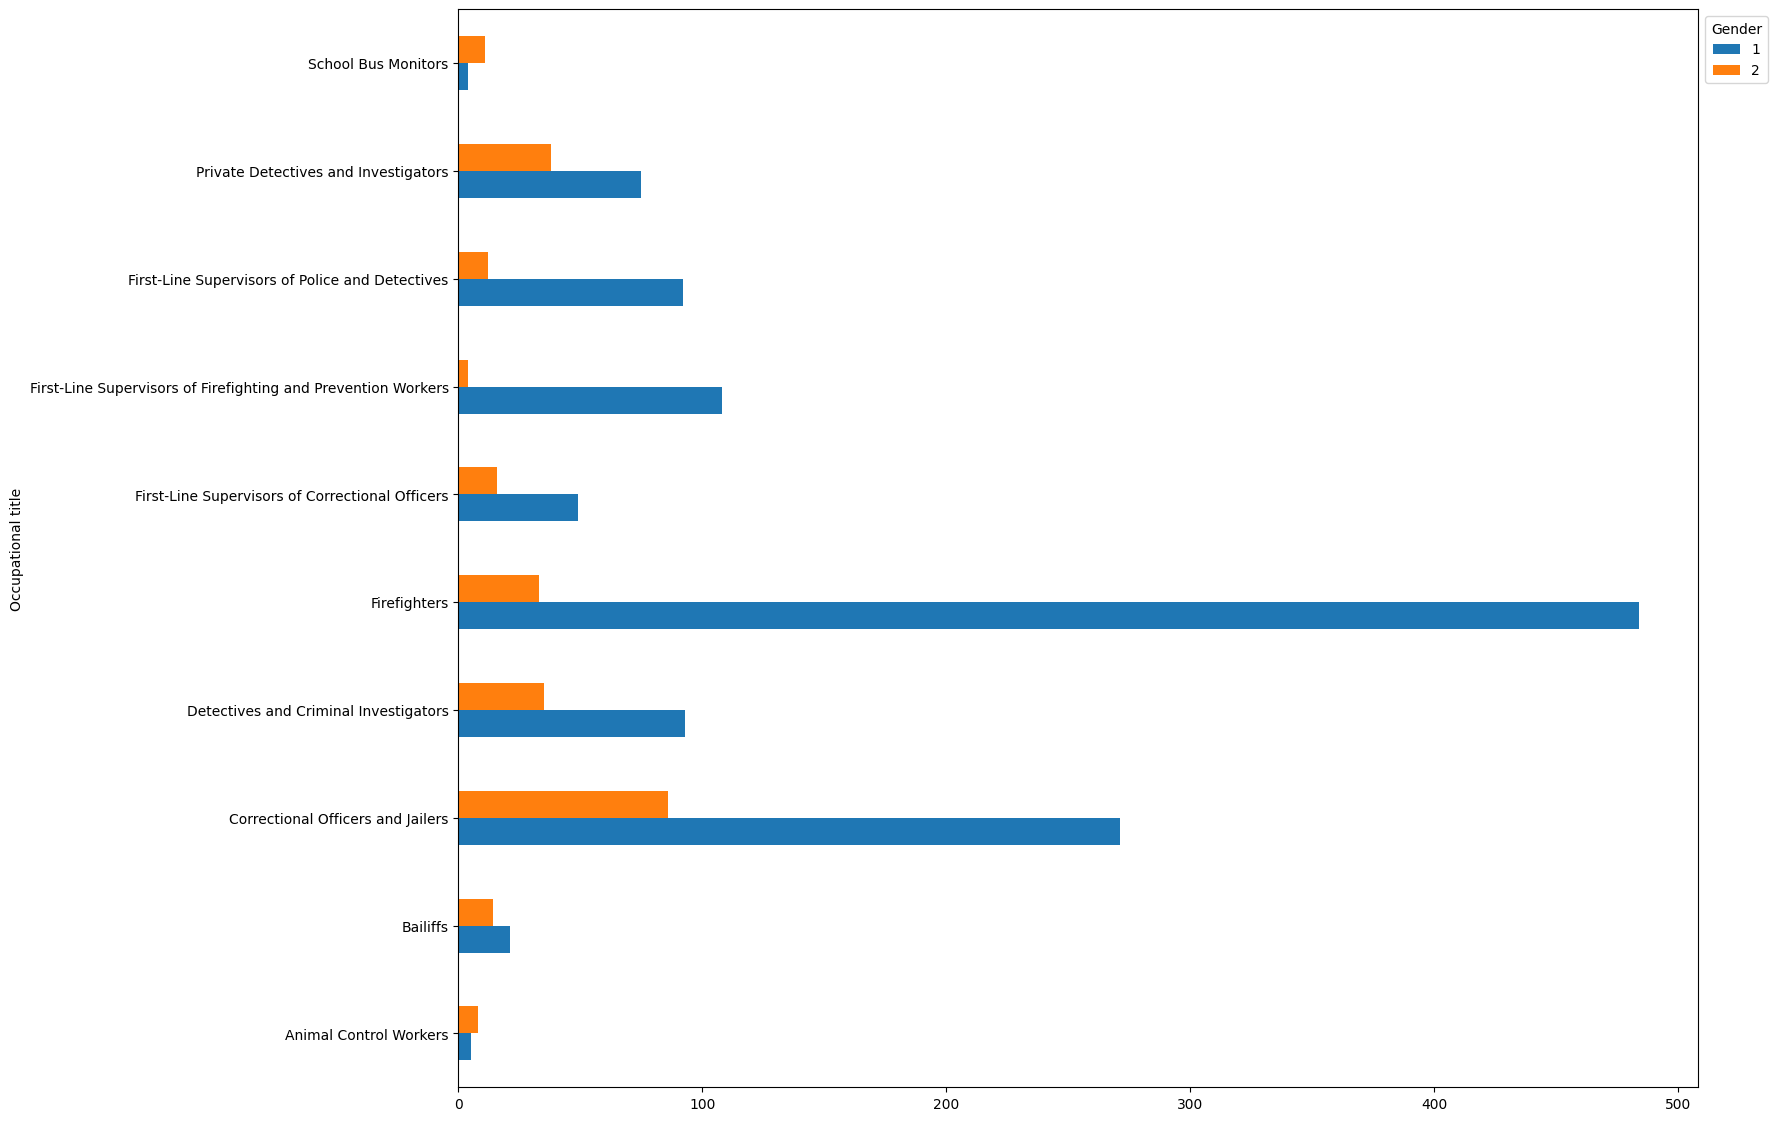

In [153]:
pums_viz_testplot = filtered_df_33.groupby(['Occupational title']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left')

Protective Service Occupations as depicted are dominated by men(Gender 1).

##### Check variations of Gender in Architecture and Engineering Occupations

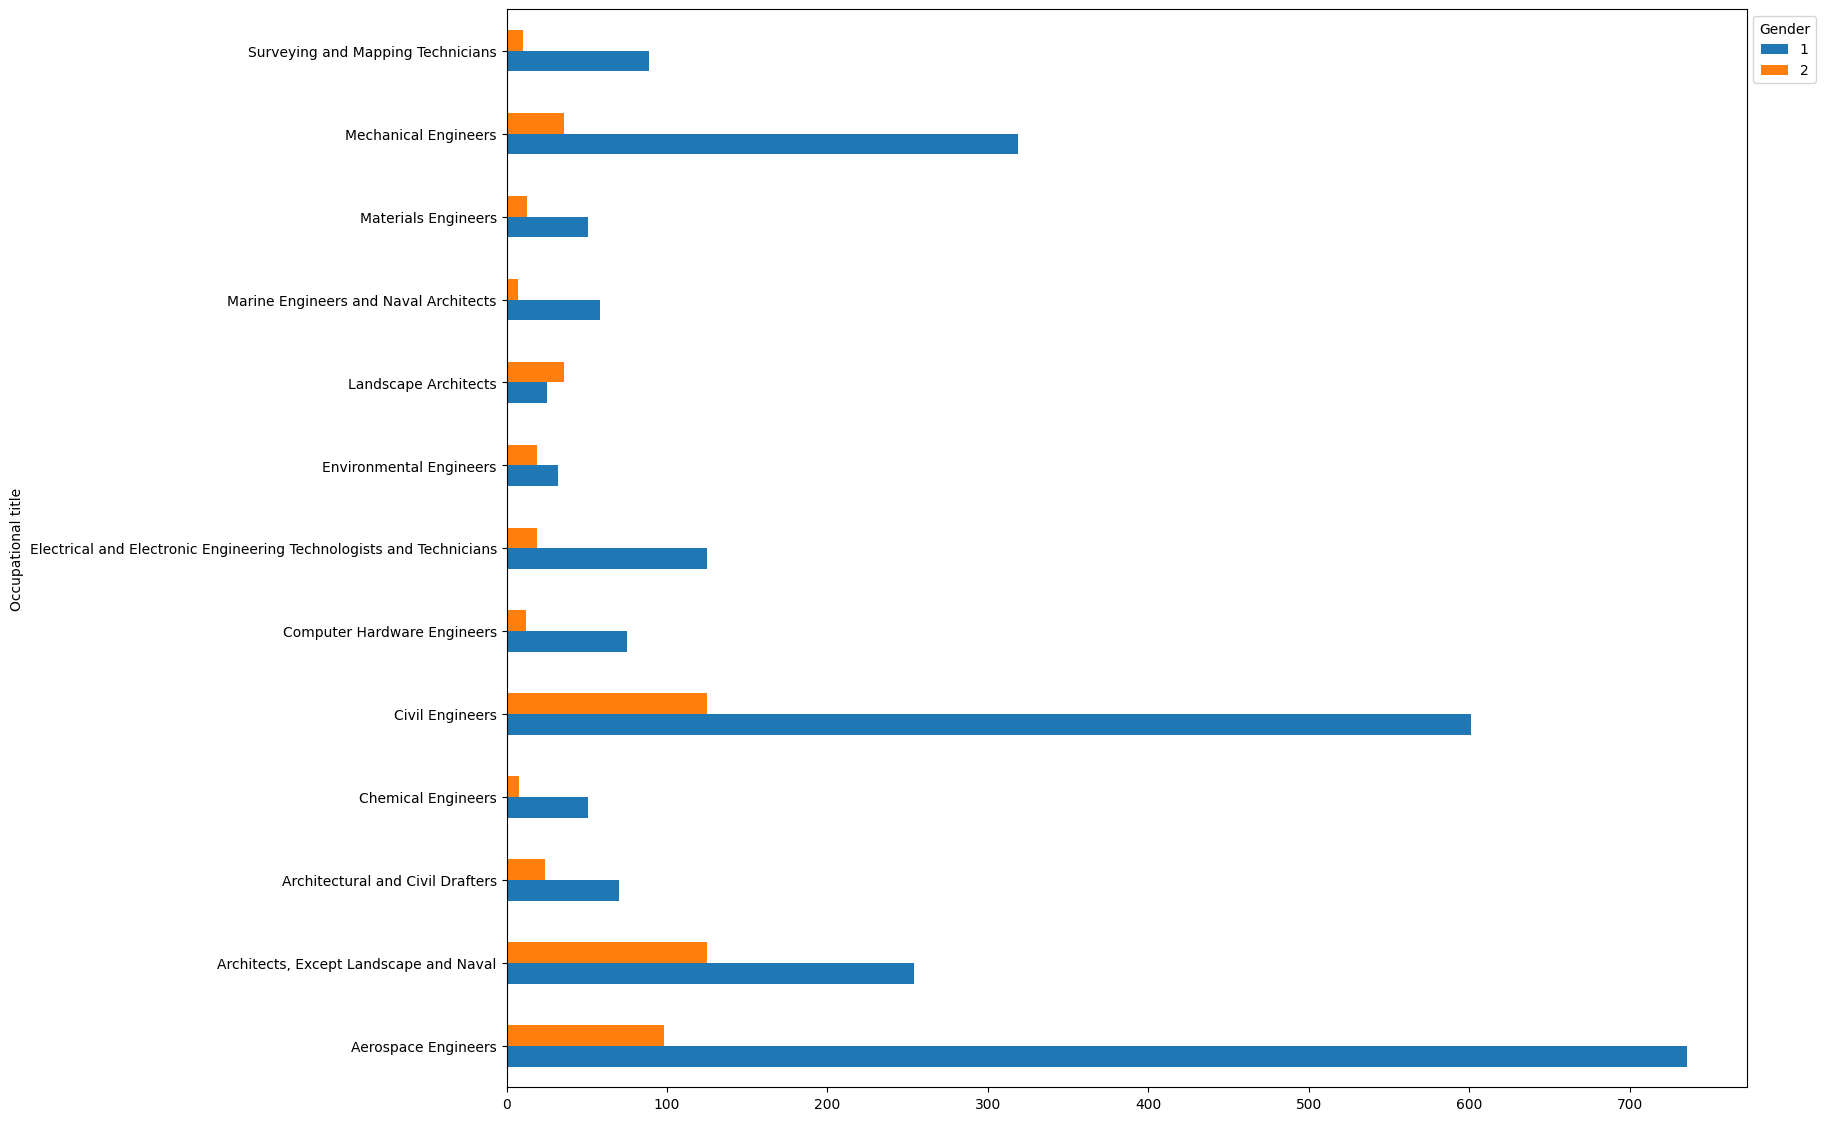

In [154]:
pums_viz_testplot = filtered_df_17.groupby(['Occupational title']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left')

As observed from the chart we see men(Gender: 1) being  more dominant in all almost all Architecture and Occupations except in the Landscape Architect occupation.

##### Check variations of Gender in Legal Occupations

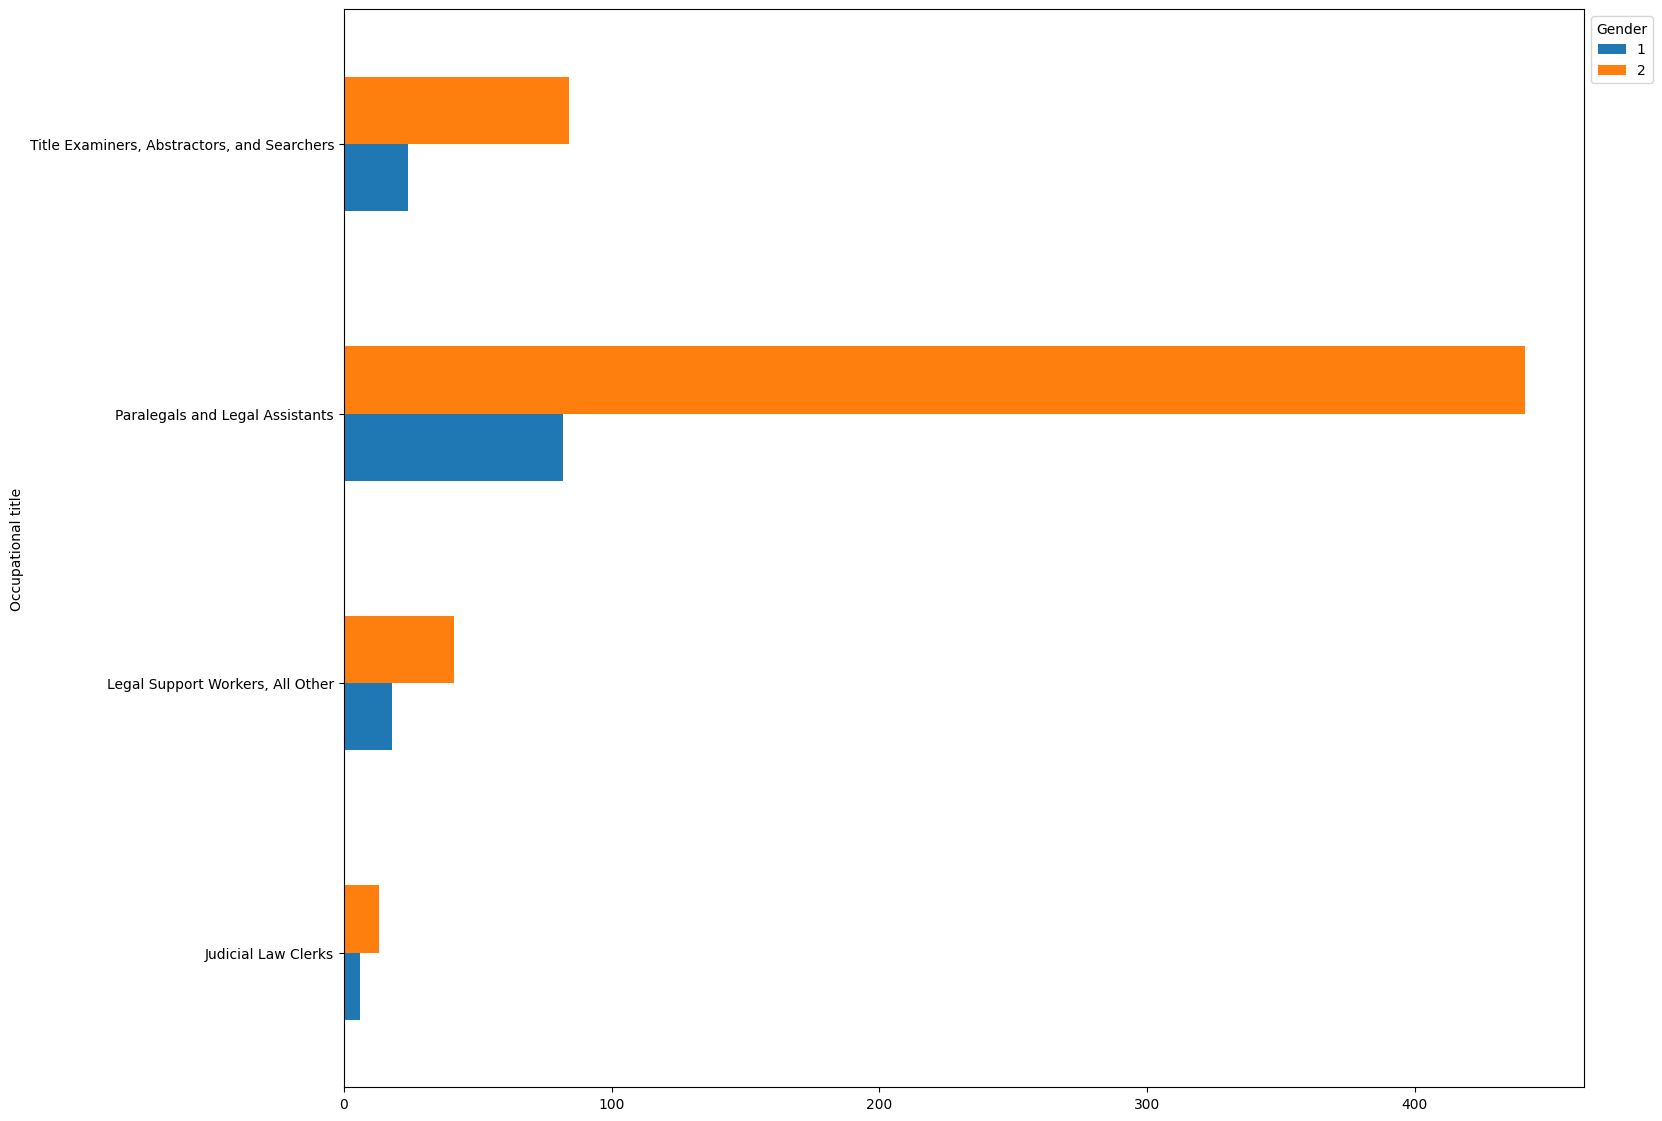

In [155]:
pums_viz_testplot = filtered_df_23.groupby(['Occupational title']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left')

We are seeing variation in the value counts , e.g, women(gender label: 2 ) are reported to be more across all the Legal Occupations than men(gender label: 1).

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [156]:
#FILL IN - saving data

filtered_df.to_csv('pums_oews_ocp_gender.csv')

In [158]:
# Read the saved CSV file into a dataframe
test_df = pd.read_csv('pums_oews_ocp_gender.csv')

#Print kthe first few lines of the dataframe
test_df.head()

,Unnamed: 0,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Occupational title,Average wage,Annual wage
0,0,1,1,2,2,1,23,111021,General and Operations Managers,64.76,134690.0
1,1,1,1,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
2,2,2,2,2,2,3,16,111021,General and Operations Managers,64.76,134690.0
3,3,1,2,2,2,1,21,111021,General and Operations Managers,64.76,134690.0
4,4,1,1,2,2,1,22,111021,General and Operations Managers,64.76,134690.0


In [159]:
# Describe the dataframe
test_df.describe()

,Unnamed: 0,WRK,SEX,DEAR,DEYE,ACCESSINET,SCHL,SOC code,Average wage,Annual wage
count,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000,18705.000000
mean,15566.834269,1.164983,1.380807,1.968404,1.988666,1.042342,19.890511,146021.534884,57.715777,120046.057739
std,15476.343004,0.371175,0.485598,0.174926,0.105858,0.267508,2.322756,61578.516583,16.752987,34848.791519
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111021.000000,20.070000,41750.000000
25%,4676.000000,1.000000,1.000000,2.000000,2.000000,1.000000,19.000000,113031.000000,41.400000,86100.000000
50%,9352.000000,1.000000,1.000000,2.000000,2.000000,1.000000,21.000000,119021.000000,54.220000,112770.000000
75%,30456.000000,1.000000,2.000000,2.000000,2.000000,1.000000,21.000000,172011.000000,72.900000,151620.000000
max,54450.000000,2.000000,2.000000,2.000000,2.000000,3.000000,24.000000,339094.000000,85.640000,178130.000000


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

- How does the distribution of occupations vary based on sex, disability status, and educational attainment?
- Are there discernible correlations between educational attainment levels and wages within different occupations?
- What is the range of the average wage corresponding to manager positions and Legal positions?

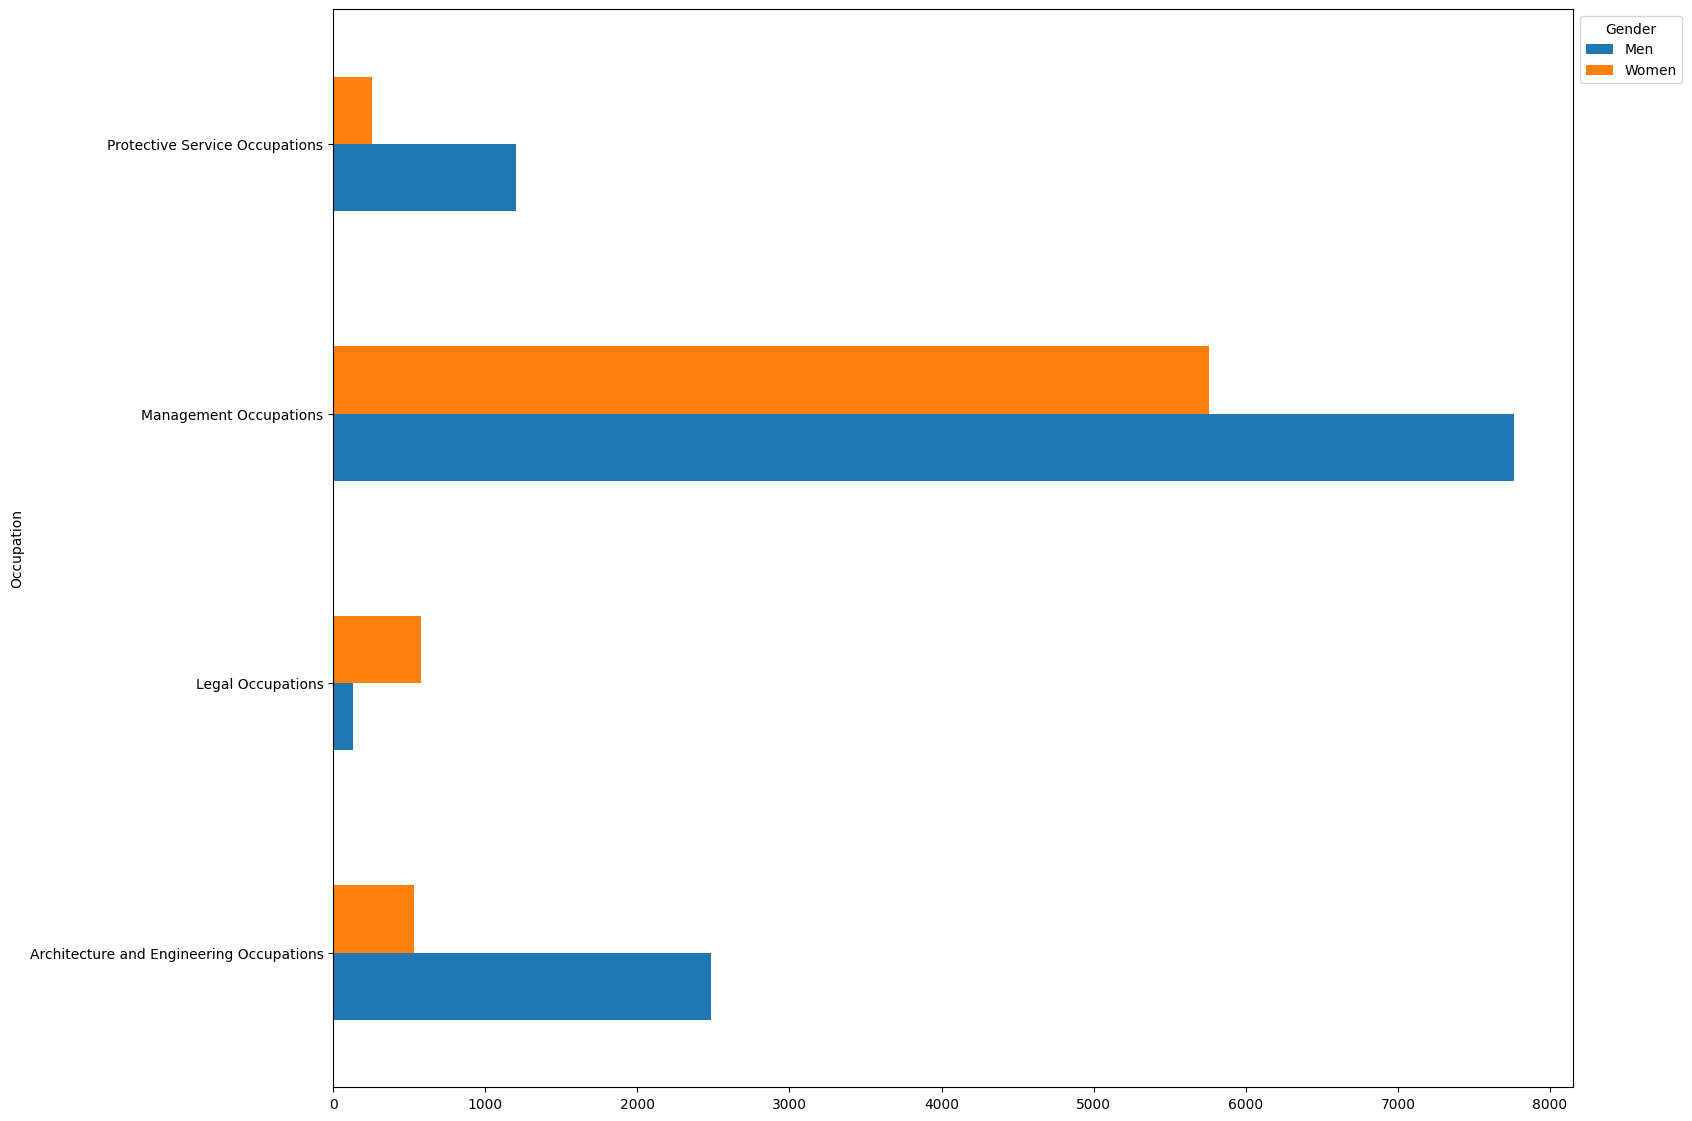

In [173]:
pums_viz_testplot_Ge = filtered_df.groupby(['Occupation']).SEX.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot_Ge.legend(title='Gender', bbox_to_anchor=(1,1), loc='upper left', labels=['Men', 'Women'])

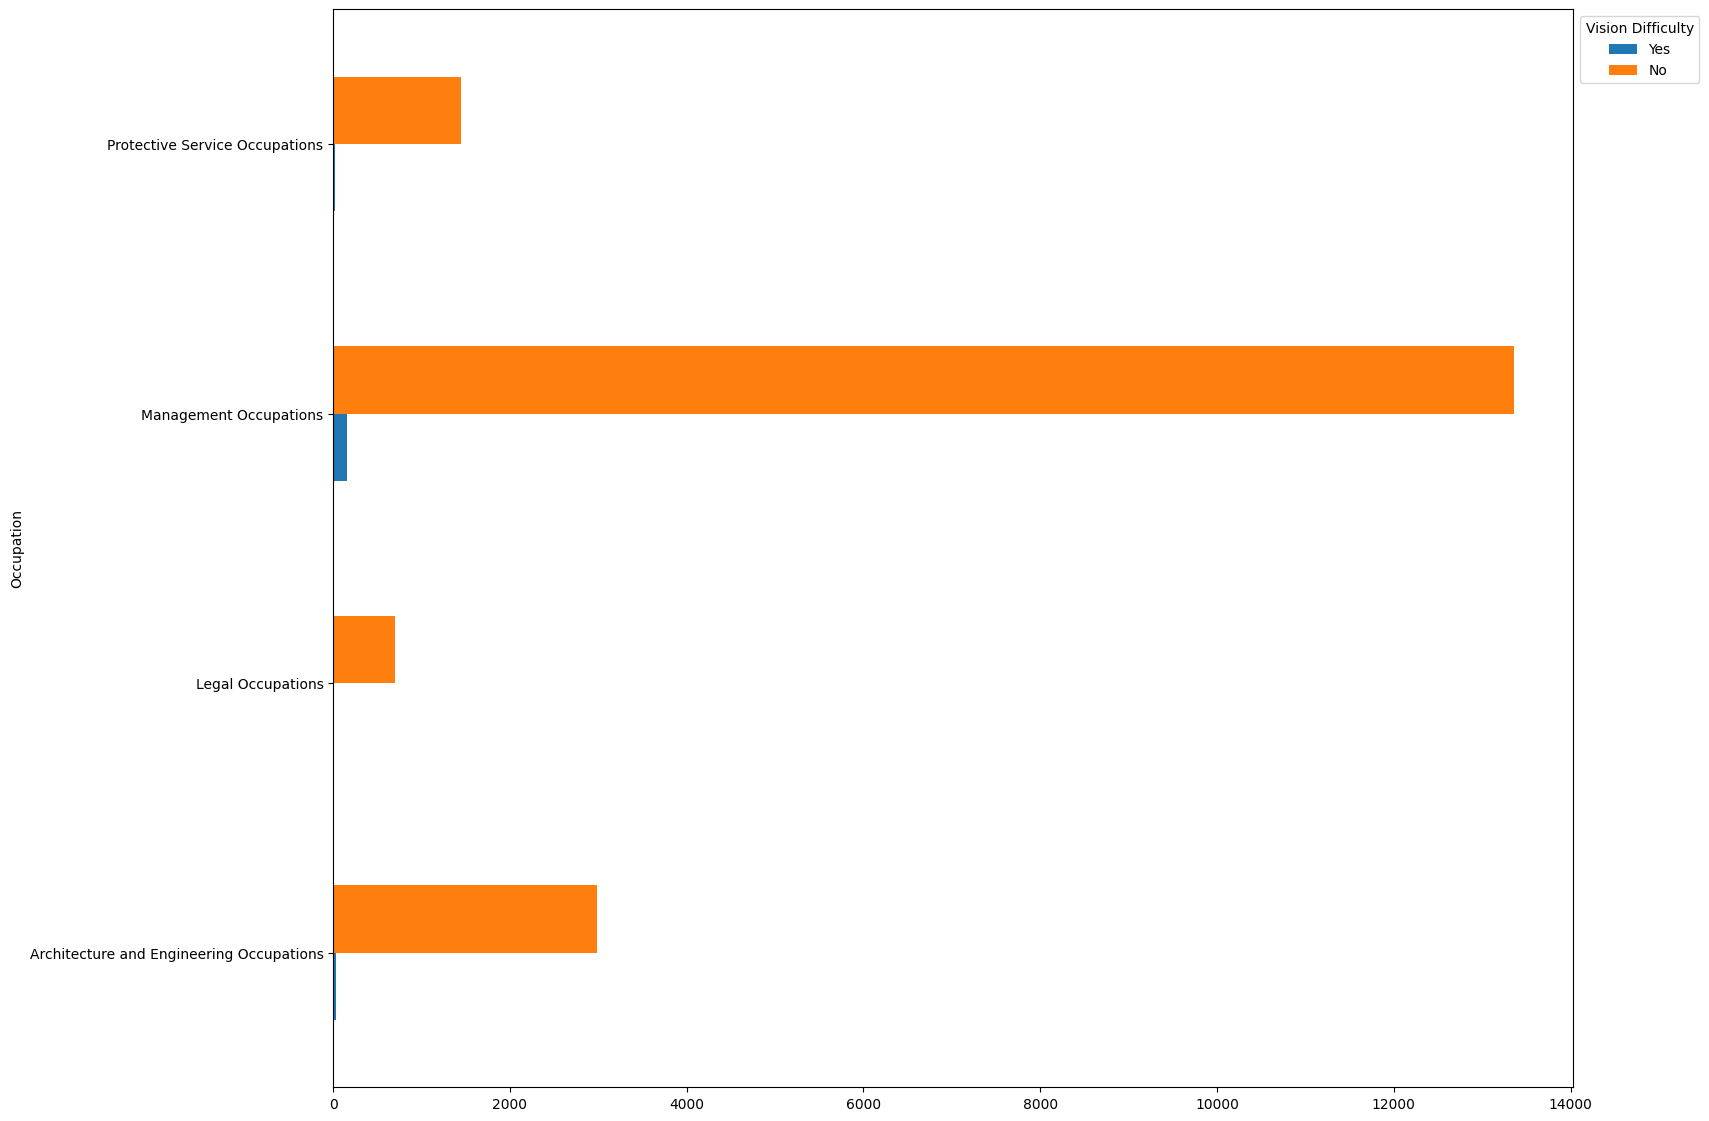

In [165]:
pums_viz_testplot = filtered_df.groupby(['Occupation']).DEYE.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot.legend(title='Vision Difficulty', bbox_to_anchor=(1,1), loc='upper left', labels=['Yes', 'No'])

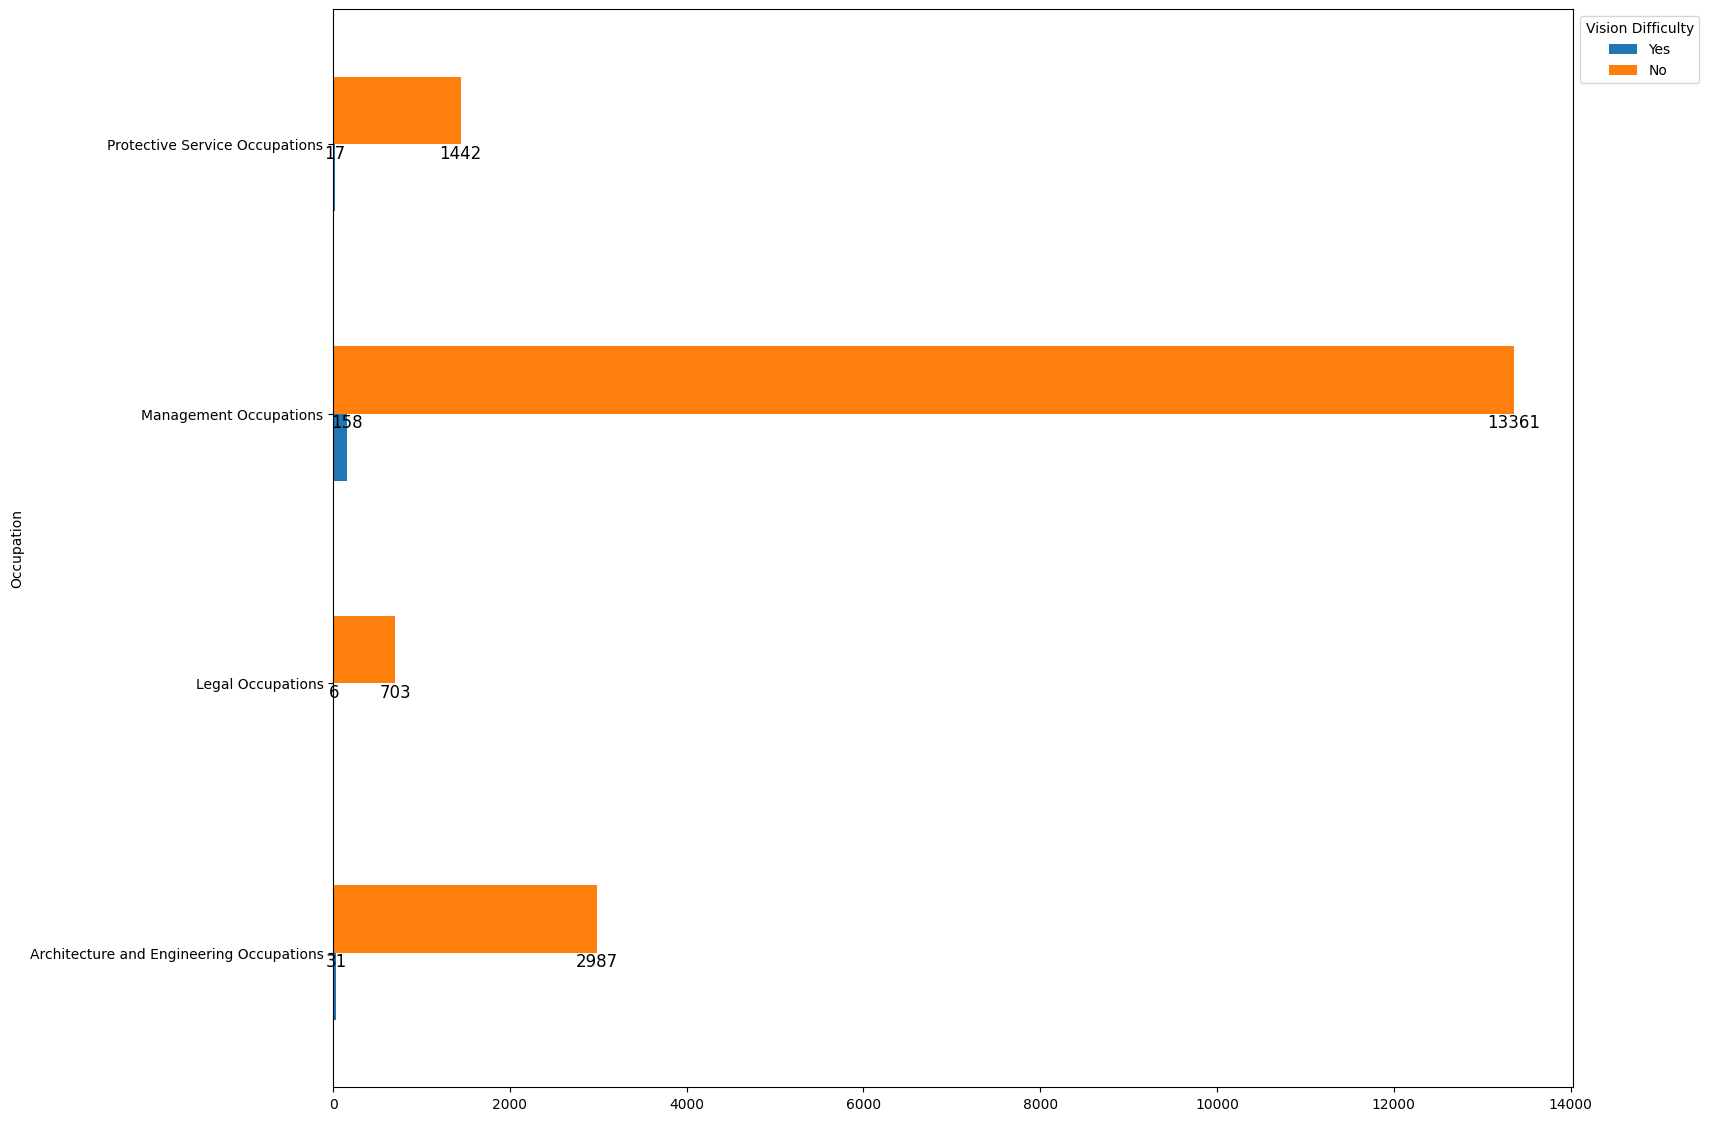

In [179]:

# Assuming 'filtered_df' is your DataFrame
pums_viz_testplot_deye = filtered_df.groupby(['Occupation']).DEYE.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot_deye.legend(title='Vision Difficulty', bbox_to_anchor=(1, 1), loc='upper left', labels=['Yes', 'No'])

# Add values on top of each bar
for index, value in enumerate(filtered_df.groupby(['Occupation']).DEYE.value_counts().unstack().values):
    pums_viz_testplot_deye.text(value[0], index, str(value[0]), color='black', ha="center", va="top", fontsize=12)
    pums_viz_testplot_deye.text(value[1], index, str(value[1]), color='black', ha="center", va="top", fontsize=12)

# Show the plot (if using in a script or non-interactive environment)
plt.show()


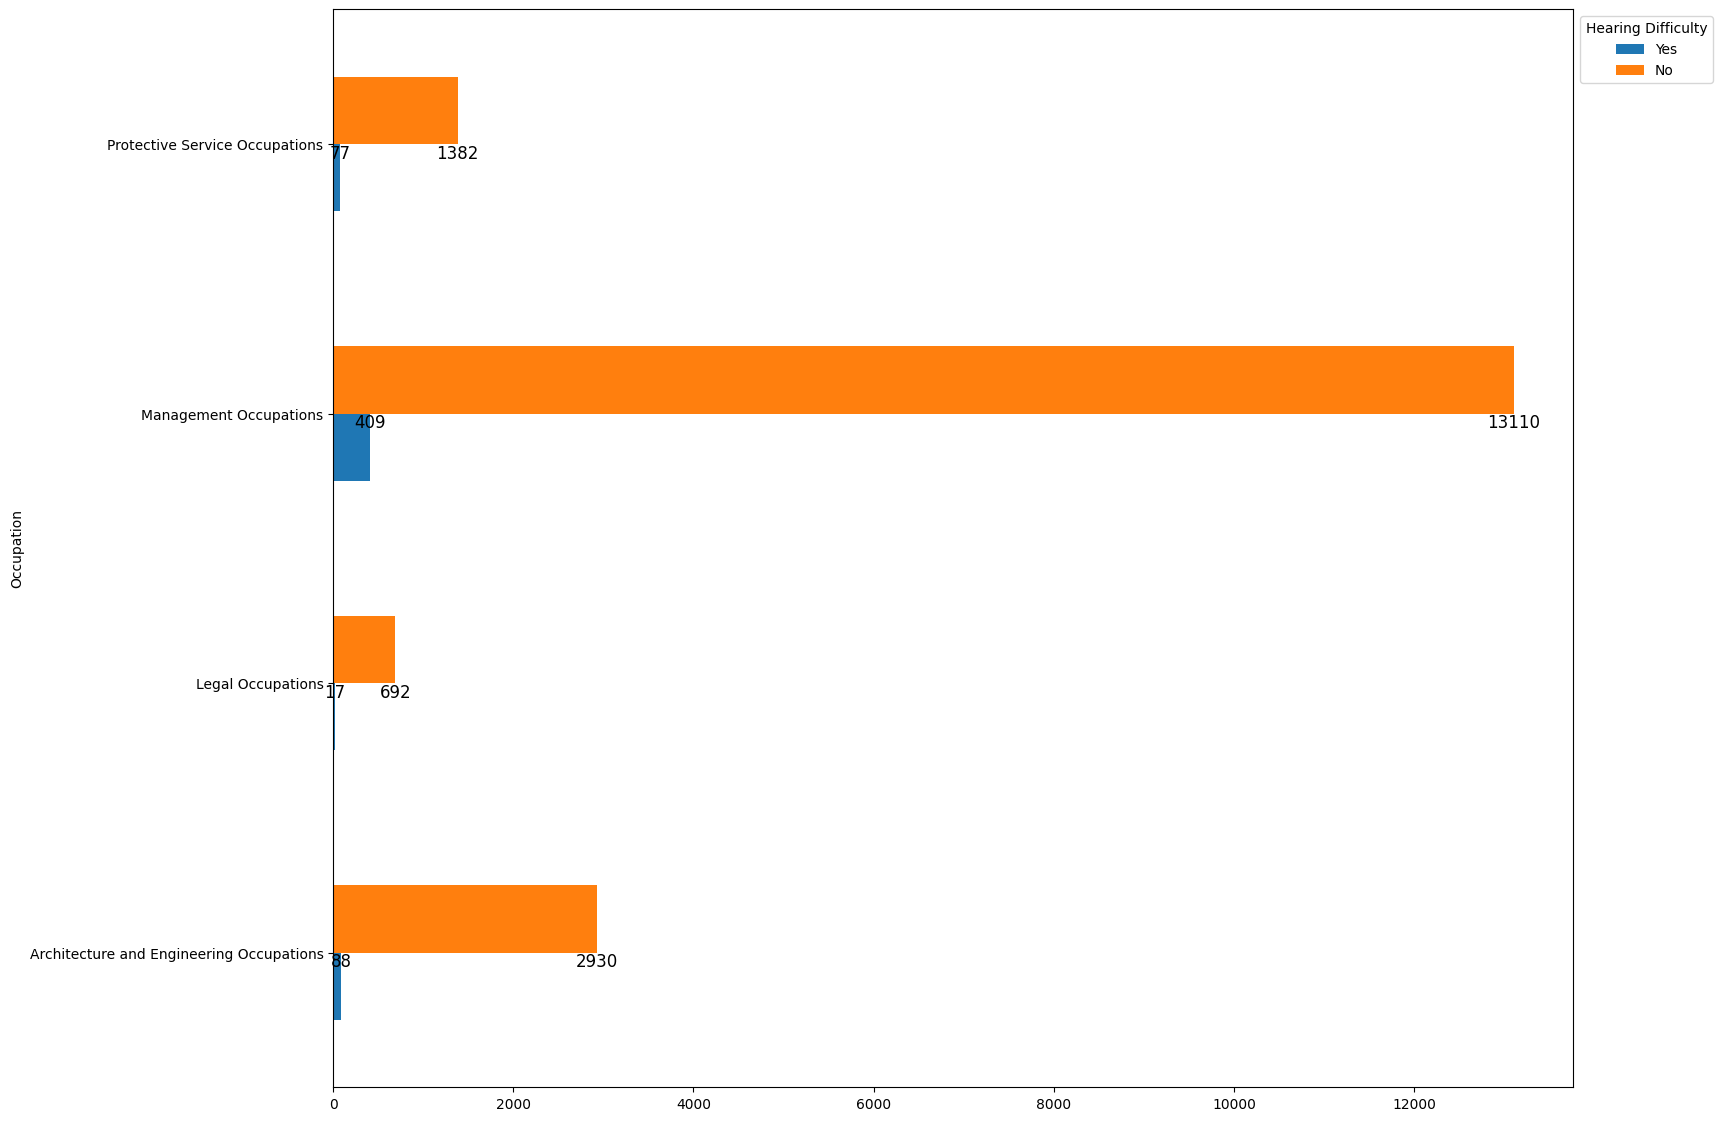

In [178]:
# Assuming 'filtered_df' is your DataFrame
pums_viz_testplot_dear = filtered_df.groupby(['Occupation']).DEAR.value_counts().unstack().plot.barh(figsize=(16, 14))
plt.xticks(rotation=0)
pums_viz_testplot_dear.legend(title='Hearing Difficulty', bbox_to_anchor=(1, 1), loc='upper left', labels=['Yes', 'No'])

# Add values on top of each bar
for index, value in enumerate(filtered_df.groupby(['Occupation']).DEAR.value_counts().unstack().values):
    pums_viz_testplot_dear.text(value[0], index, str(value[0]), color='black', ha="center", va="top", fontsize=12)
    pums_viz_testplot_dear.text(value[1], index, str(value[1]), color='black', ha="center", va="top", fontsize=12)

# Show the plot (if using in a script or non-interactive environment)
plt.show()

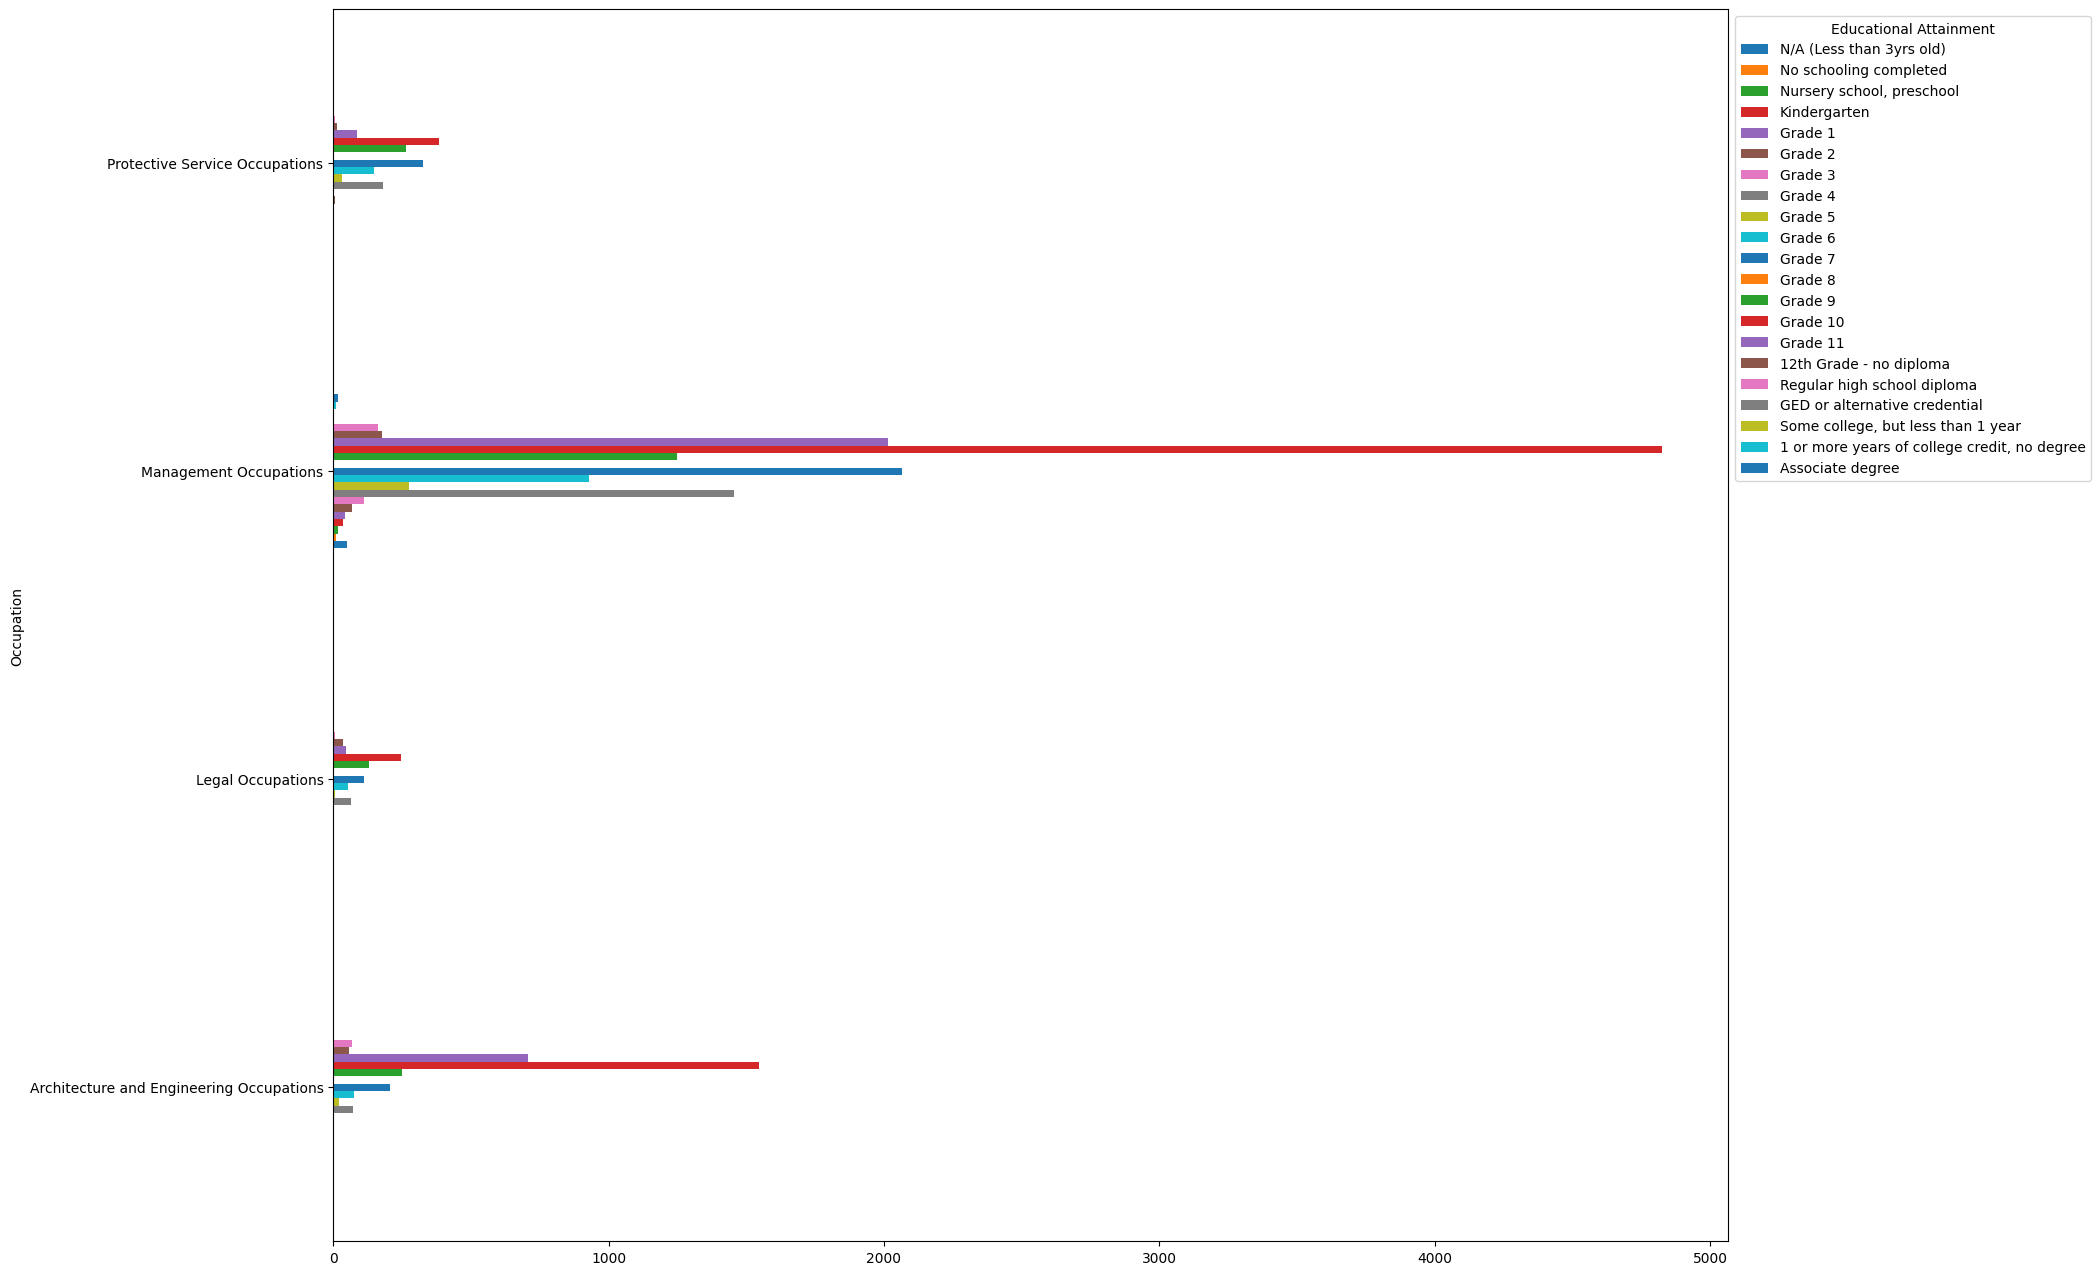

In [200]:
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame
education_labels = {
    0: "N/A (Less than 3yrs old)",
    1: "No schooling completed",
    2: "Nursery school, preschool",
    3: "Kindergarten",
    4: "Grade 1",
    5: "Grade 2",
    6: "Grade 3",
    7: "Grade 4",
    8: "Grade 5",
    9: "Grade 6",
    10: "Grade 7",
    11: "Grade 8",
    12: "Grade 9",
    13: "Grade 10",
    14: "Grade 11",
    15: "12th Grade - no diploma",
    16: "Regular high school diploma",
    17: "GED or alternative credential",
    18: "Some college, but less than 1 year",
    19: "1 or more years of college credit, no degree",
    20: "Associate degree",
    21: "Bachelor's degree",
    22: "Master's degree",
    23: "Professional degree beyond Bachelor Degree",
    24: "Doctorate degree"
}

pums_viz_testplot_Ge = filtered_df.groupby(['Occupation']).SCHL.value_counts().unstack().plot.barh(figsize=(18, 16))
plt.xticks(rotation=0)

# Create a legend with educational attainment labels
plt.legend(title='Educational Attainment', bbox_to_anchor=(1, 1), loc='upper left', labels=education_labels.values())

# Show the plot (if using in a script or non-interactive environment)
plt.show()



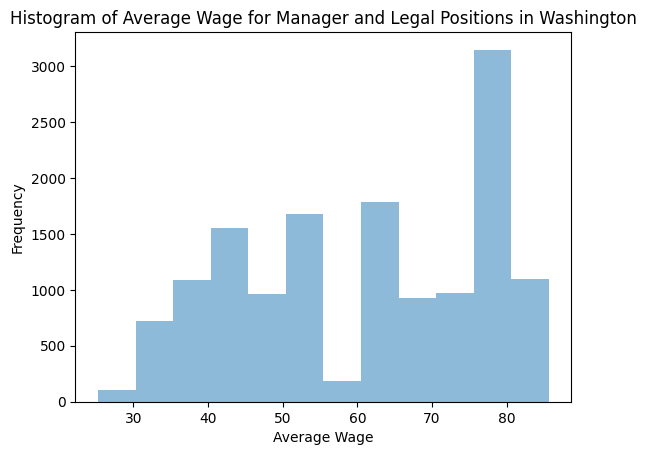

Range of Average Wage for Manager and Legal Positions in Washington: 60.36


In [206]:

# Filter the DataFrame using occupation
manager_legal_df = filtered_df[filtered_df['Occupation'].isin(['Management Occupations', 'Legal Occupations'])]

# Plot the histogram for the filtered data
manager_legal_df['Average wage'].plot.hist(bins=12, alpha=0.5)

# Set labels and title
plt.xlabel('Average Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Average Wage for Manager and Legal Positions in Washington')

# Show the plot
plt.show()

# Calculate the range of the 'Average wage' for manager and legal positions in Washington
range_manager_legal = manager_legal_df['Average wage'].max() - manager_legal_df['Average wage'].min()

print(f"Range of Average Wage for Manager and Legal Positions in Washington: {range_manager_legal}")


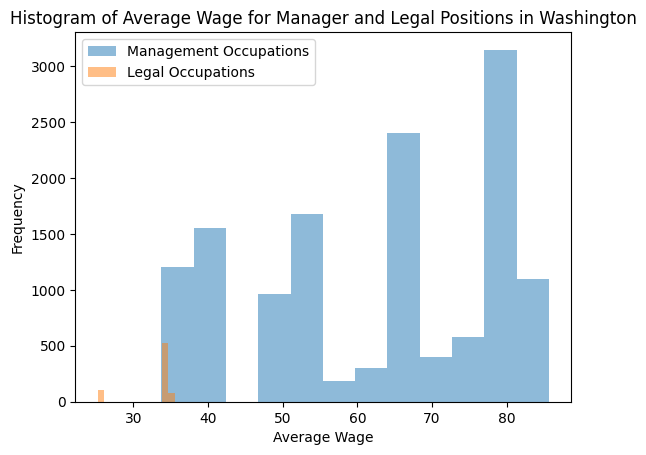

Range of Average Wage for Management Occupations in Washington: 51.87
Range of Average Wage for Legal Occupations in Washington: 10.259999999999998


In [207]:
import matplotlib.pyplot as plt

# Filter the DataFrame using occupation
manager_legal_df = filtered_df[filtered_df['Occupation'].isin(['Management Occupations', 'Legal Occupations'])]

# Separate the data for each occupation
manager_df = manager_legal_df[manager_legal_df['Occupation'] == 'Management Occupations']
legal_df = manager_legal_df[manager_legal_df['Occupation'] == 'Legal Occupations']

# Plot histograms for each occupation
plt.hist(manager_df['Average wage'], bins=12, alpha=0.5, label='Management Occupations')
plt.hist(legal_df['Average wage'], bins=12, alpha=0.5, label='Legal Occupations')

# Set labels and title
plt.xlabel('Average Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Average Wage for Manager and Legal Positions in Washington')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Calculate the range of the 'Average wage' for manager and legal positions in Washington
range_manager = manager_df['Average wage'].max() - manager_df['Average wage'].min()
range_legal = legal_df['Average wage'].max() - legal_df['Average wage'].min()

print(f"Range of Average Wage for Management Occupations in Washington: {range_manager}")
print(f"Range of Average Wage for Legal Occupations in Washington: {range_legal}")


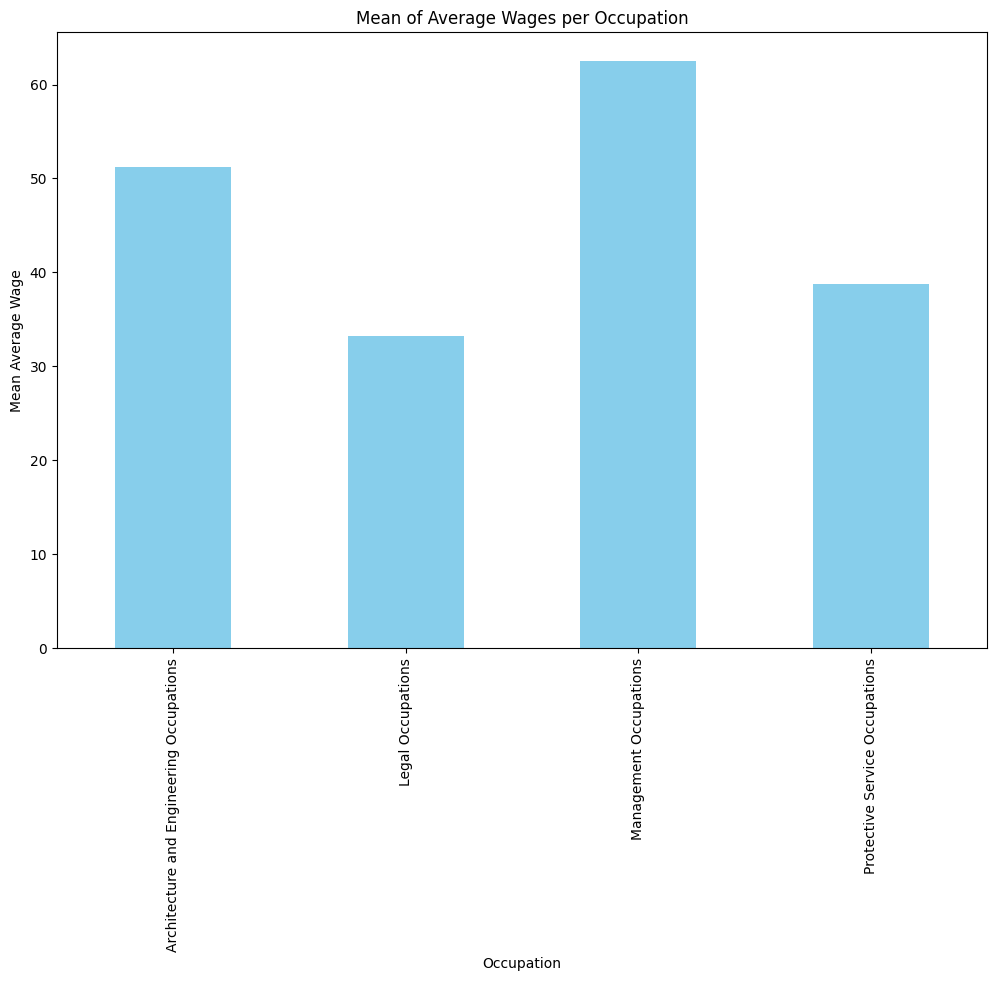

In [215]:
# Group by 'Occupation', calculate the mean of the average wage
grouped_df = filtered_df.groupby('Occupation')['Average wage'].mean()

# Plot the data
grouped_df.plot(kind='bar', figsize=(12, 8), color='skyblue')
plt.title('Mean of Average Wages per Occupation')
plt.xlabel('Occupation')
plt.ylabel('Mean Average Wage')

# Show the plot
plt.show()

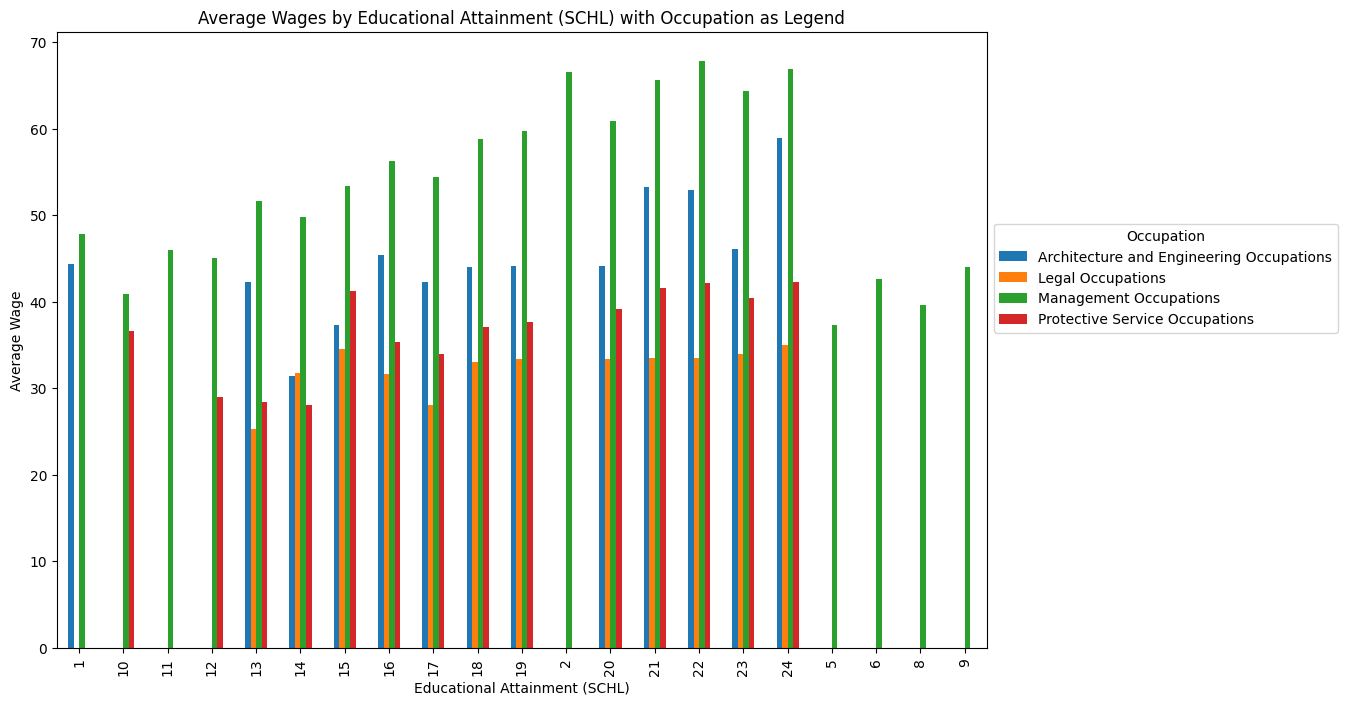

In [219]:
# Group by 'SCHL' and 'Occupation', calculate the mean of the 'Average wage'
grouped_df = filtered_df.groupby(['SCHL', 'Occupation'])['Average wage'].mean().unstack()

# Plot the data
ax = grouped_df.plot(kind='bar', figsize=(12, 8))

# Add legend for 'SCHL'
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Educational Attainment (SCHL)', bbox_to_anchor=(1, 1), loc='upper left')

# Add legend for 'Occupation'
plt.legend(title='Occupation', bbox_to_anchor=(1, 0.7), loc='upper left')

plt.title('Average Wages by Educational Attainment (SCHL) with Occupation as Legend')
plt.xlabel('Educational Attainment (SCHL)')
plt.ylabel('Average Wage')

# Show the plot
plt.show()

In [221]:
# Map 'SCHL' values to labels
schl_labels = {
    1: 'No schooling completed',
    2: 'Nursery school, preschool',
    3: 'Kindergarten',
    4: 'Grade 1',
    5: 'Grade 2',
    6: 'Grade 3',
    7: 'Grade 4',
    8: 'Grade 5',
    9: 'Grade 6',
    10: 'Grade 7',
    11: 'Grade 8',
    12: 'Grade 9',
    13: 'Grade 10',
    14: 'Grade 11',
    15: '12th Grade - no diploma',
    16: 'Regular high school diploma',
    17: 'GED or alternative credential',
    18: 'Some college, but less than 1 year',
    19: '1 or more years of college credit, no degree',
    20: 'Associate degree',
    21: "Bachelor's degree",
    22: "Master's degree",
    23: "Professional degree beyond a bachelor's degree",
    24: 'Doctorate degree'
}

# Group by 'SCHL' and 'Occupation', calculate the mean of the 'Average wage'
grouped_df = filtered_df.groupby(['SCHL', 'Occupation'])['Average wage'].mean().unstack()

# Map 'SCHL' values to labels for legend
schl_legend_labels = {key: f'{key}: {value}' for key, value in schl_labels.items()}

# Create a consolidated mean per occupation
consolidated_mean_per_occupation = filtered_df.groupby('Occupation')['Average wage'].mean()

# Print the consolidated mean per occupation
print(consolidated_mean_per_occupation)

Occupation
Architecture and Engineering Occupations    51.257028
Legal Occupations                           33.246615
Management Occupations                      62.484264
Protective Service Occupations              38.782228
Name: Average wage, dtype: float64


#### Answers

1. How does the distribution of occupations vary based on sex, disability status, and educational attainment?
   - Women seem to dominate the Legal Occupation class more than men, whereas other occupation classes like Protective Service Occupations, and Architecture and Engineering have low participation of women. Management Occupation is seen to be having a significant number of women almost up to par with men.  



2. Are there discernible correlations between educational attainment levels and wages within different occupations?
   - Legal Occupations are seen to be having an average of 33.24dollars with educational attainment level like (Grade 10,Grade15: '12th Grade - no diploma',Regular high school diploma,GED or alternative credential,Some college, but less than 1 year,1 or more years of college credit, no degree,Associate degree,Bachelor's degree,Master's degree,Professional degree beyond a bachelor's degree,Doctorate degree.
   
  - Architecture and Engineering Occupations    51.257028
  - Legal Occupations                           33.246615
  - Management Occupations                      62.484264
  - Protective Service Occupations              38.782228

3. What is the range of the average wage corresponding to manager positions and Legal positions?

    - Management Occupations: 51.27usd
    - Legal Occupations: 10.26usd

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* I would look into the validity of the data quality issue, inspecting the range of the individaul variables, potentially bringing in additional data to ensure the data captures accurate information. As a research question, I would explore which occupations correspond to the lower vs higher ends of the mean hourly wage, which would involve bucketing the hourly mean variable.